In [53]:
#learning xarray
import numpy as np
import netCDF4
import matplotlib.pyplot as plt
from cartopy import config
import cartopy.crs as ccrs
#matplotlib.use('Agg')
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from scipy import stats
import time
#import numexpr as ne
import xarray as xr
rEarth = 6371220. #in m ##  get from file variable #f_in.sphere_radius
import glob
from netCDF4 import Dataset
import _pickle as pickle



In [54]:
path="./d_1027_c_1d_r200/"

mux  =np.rad2deg(pickle.load(open(path+"mux.p","rb")))
muy  =np.rad2deg(pickle.load(open(path+"muy.p","rb")))
urms =pickle.load(open(path+"urms.p","rb"))
vrms =pickle.load(open(path+"vrms.p","rb"))
Npart=pickle.load(open(path+"Npart.p","rb"))
umean=pickle.load(open(path+"umean.p","rb"))
vmean=pickle.load(open(path+"vmean.p","rb"))
drdr =pickle.load(open(path+"drdr.p","rb"))
dxdx =pickle.load(open(path+"dxdx.p","rb"))
dxdy =pickle.load(open(path+"dxdy.p","rb"))
dydy =pickle.load(open(path+"dydy.p","rb"))
depth=pickle.load(open(path+"depth.p","rb"))



In [55]:
## error between ensembel cluster center ad defined cluster
#ind=np.where(mux[0,0,:]!=0.)
ind=np.where(Npart[0,0,:]>50)


dxdx1=dxdx[:,:,ind[0]]
dxdy1=dxdy[:,:,ind[0]]
dydy1=dydy[:,:,ind[0]]
drdr1=drdr[:,:,ind[0]]
urms1=urms[:,:,ind[0]]
vrms1=vrms[:,:,ind[0]]
mux1=mux[:,:,ind[0]]
muy1=muy[:,:,ind[0]]
vrms1=vrms[:,:,ind[0]]
Npart1=Npart[:,:,ind[0]]
umean1=umean[:,:,ind[0]]
vmean1=vmean[:,:,ind[0]]


krr1=0.5*(np.diff(drdr1,axis=1))/(3600*24)
kxx1=0.5*(np.diff(dxdx1,axis=1))/(3600*24)
kxy1=0.5*(np.diff(dxdy1,axis=1))/(3600*24)
kyy1=0.5*(np.diff(dydy1,axis=1))/(3600*24)

#avg over all realizations
mux2=np.nanmean(mux1,axis=0)
muy2=np.nanmean(muy1,axis=0)
krr2=np.nanmean(krr1,axis=0)
kxx2=np.nanmean(kxx1,axis=0)
kxy2=np.nanmean(kxy1,axis=0)
kyy2=np.nanmean(kyy1,axis=0)


/global/cfs/cdirs/e3sm/software/anaconda_envs/base/envs/e3sm_unified_1.4.0/lib/python3.7/site-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


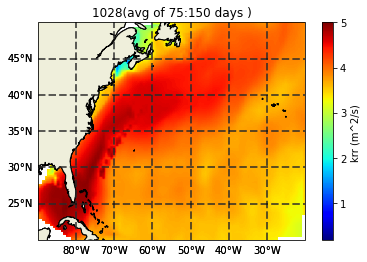

In [56]:
from scipy.interpolate import griddata
#x,y=np.meshgrid(np.linspace(-90,-20,71),np.linspace(20,50,31)) #cluster center at 1 degree

#x,y=np.meshgrid(mux1[0,0,:],muy1[0,0,:])
#x=x.ravel(); y=y.ravel() #clusters

x=np.nanmean(mux2[75:150,:],axis=0)
y=np.nanmean(muy2[75:150,:],axis=0)

x=(mux2[80,:])
y=(muy2[80,:])

points=np.vstack((x,y)).T

values=np.mean(krr2[75:150,:],axis=0) #data to be interpolated

grid_x,grid_y=np.meshgrid(np.linspace(-90,-20,100),np.linspace(20,50,100))##interolated to these points
grid_z1 = griddata(points, values, (grid_x, grid_y), method='linear')
#grid_z1=np.where(grid_z1>10**5.5, np.nan,grid_z1)

from cartopy.feature import LAND
import cartopy as cart

fig= plt.figure(figsize=(6,4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
#gl.xlines = False
#gl.ylines = False
plt.xlabel("lon")
plt.ylabel("lat")
plt.title ("1028(avg of 75:150 days )")
plt.imshow(np.log10(np.abs(grid_z1)),transform=ccrs.PlateCarree(),extent=[-90, -20, 20, 50] ,cmap="jet" ,origin='lower')#,vmin=-1, vmax=4)

plt.colorbar(label='krr (m^2/s) ', orientation="vertical")
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='black', alpha=0.5, linestyle='--')

gl.xlabels_top = False
gl.ylabels_right = False

ax.add_feature(cart.feature.LAND, zorder=1, edgecolor='k')
ax.set_aspect('auto')



In [57]:
drdr2=(np.nanmean(drdr1,axis=0))
dxdx2=(np.nanmean(dxdx1,axis=0))
dydy2=(np.nanmean(dydy1,axis=0))

Text(0.5, 0.98, '1027_r100')

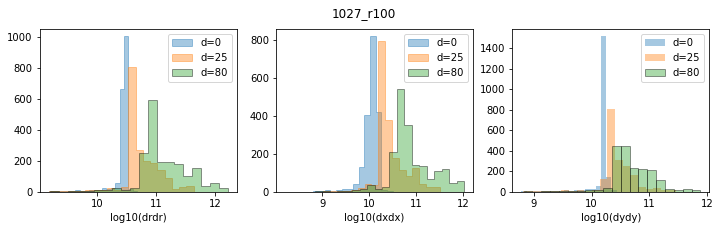

In [58]:
fig= plt.figure(figsize=(12,3))
plt.subplot(131)
plt.hist(np.log10(drdr2[0,:]),20,histtype='step',alpha=0.4,stacked=False,fill=True)
plt.hist(np.log10(drdr2[25,:]),20,histtype='step',alpha=0.4,stacked=False,fill=True)
#plt.hist(np.log10(drdr2[50,:]),20,histtype='step',alpha=0.6,stacked=False,fill=True)
plt.hist(np.log10(drdr2[80,:]),20,histtype='step',edgecolor='k',alpha=0.4,stacked=False,fill=True)
#plt.hist(np.log10(drdr2[150,:]),20,histtype='step',alpha=0.4,stacked=False,fill=True)
plt.xlabel('log10(drdr)')
plt.legend(['d=0','d=25','d=80','d=150'])

plt.subplot(132)
plt.hist(np.log10(dxdx2[0,:]),20,histtype='step',alpha=0.4,stacked=False,fill=True)
plt.hist(np.log10(dxdx2[25,:]),20,histtype='step',alpha=0.4,stacked=False,fill=True)
#plt.hist(np.log10(dxdx2[50,:]),20,histtype='step',alpha=0.4,stacked=False,fill=True)
plt.hist(np.log10(dxdx2[80,:]),20,histtype='step',edgecolor='k',alpha=0.4,stacked=False,fill=True)
#plt.hist(np.log10(dxdx2[150,:]),20,histtype='step',alpha=0.4,stacked=False,fill=True)
plt.xlabel('log10(dxdx)')
plt.legend(['d=0','d=25','d=80','d=150'])

plt.subplot(133)
plt.hist(np.log10(dydy2[0,:]),20,histtype='bar',alpha=0.4,stacked=False,fill=True)
plt.hist(np.log10(dydy2[25,:]),20,histtype='bar',alpha=0.4,stacked=False,fill=True)
#plt.hist(np.log10(dydy2[50,:]),20,histtype='step',alpha=0.6,stacked=False,fill=True)
plt.hist(np.log10(dydy2[80,:]),20,histtype='bar',edgecolor='k',alpha=0.4,stacked=False,fill=True)
#plt.hist(np.log10(dydy2[150,:]),20,histtype='bar',alpha=0.4,stacked=False,fill=True)
plt.xlabel('log10(dydy)')
plt.legend(['d=0','d=25','d=80','d=150'])

plt.suptitle("1027_r100")

Text(0.5, 0.98, '1028_r100')

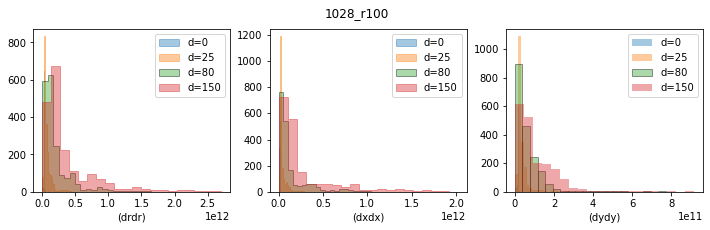

In [59]:
fig= plt.figure(figsize=(12,3))
plt.subplot(131)
plt.hist((drdr2[0,:]),20,histtype='step',alpha=0.4,stacked=False,fill=True)
plt.hist((drdr2[25,:]),20,histtype='step',alpha=0.4,stacked=False,fill=True)
#plt.hist(np.log10(drdr2[50,:]),20,histtype='step',alpha=0.6,stacked=False,fill=True)
plt.hist((drdr2[80,:]),20,histtype='step',edgecolor='k',alpha=0.4,stacked=False,fill=True)
plt.hist((drdr2[150,:]),20,histtype='step',alpha=0.4,stacked=False,fill=True)
plt.xlabel('(drdr)')
plt.legend(['d=0','d=25','d=80','d=150'])

plt.subplot(132)
plt.hist((dxdx2[0,:]),20,histtype='step',alpha=0.4,stacked=False,fill=True)
plt.hist((dxdx2[25,:]),20,histtype='step',alpha=0.4,stacked=False,fill=True)
#plt.hist(np.log10(dxdx2[50,:]),20,histtype='step',alpha=0.4,stacked=False,fill=True)
plt.hist((dxdx2[80,:]),20,histtype='step',edgecolor='k',alpha=0.4,stacked=False,fill=True)
plt.hist((dxdx2[150,:]),20,histtype='step',alpha=0.4,stacked=False,fill=True)
plt.xlabel('(dxdx)')
plt.legend(['d=0','d=25','d=80','d=150'])

plt.subplot(133)
plt.hist((dydy2[0,:]),20,histtype='bar',alpha=0.4,stacked=False,fill=True)
plt.hist((dydy2[25,:]),20,histtype='bar',alpha=0.4,stacked=False,fill=True)
#plt.hist(np.log10(dydy2[50,:]),20,histtype='step',alpha=0.6,stacked=False,fill=True)
plt.hist((dydy2[80,:]),20,histtype='bar',edgecolor='k',alpha=0.4,stacked=False,fill=True)
plt.hist((dydy2[150,:]),20,histtype='bar',alpha=0.4,stacked=False,fill=True)
plt.xlabel('(dydy)')
plt.legend(['d=0','d=25','d=80','d=150'])

plt.suptitle("1028_r100")

Text(0.5, 0.98, '1027-r200')

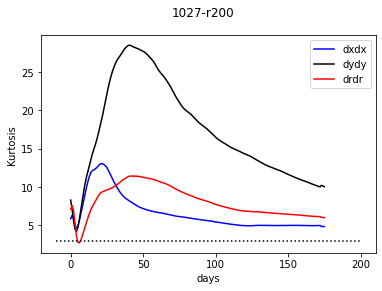

In [60]:
from scipy.stats import kurtosis
kr=kurtosis(dxdx2[:,:],axis=1)
plt.plot(kr[:-5],'b')
kr=kurtosis(dydy2[:,:],axis=1)
plt.plot(kr[:-5],'k')
kr=kurtosis(drdr2[:,:],axis=1)
plt.plot(kr[:-5],'r')
plt.legend(['dxdx','dydy','drdr'])
plt.plot([-10,200],[3,3],':k')
plt.ylabel('Kurtosis')
plt.xlabel('days')
plt.suptitle("1027-r200")
#plt.yscale('log')
#plt.xscale('log')

/global/cfs/cdirs/e3sm/software/anaconda_envs/base/envs/e3sm_unified_1.4.0/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/global/cfs/cdirs/e3sm/software/anaconda_envs/base/envs/e3sm_unified_1.4.0/lib/python3.7/site-packages/scipy/stats/stats.py:1082: RuntimeWarning: invalid value encountered in subtract
  a_zero_mean = a - np.expand_dims(np.mean(a, axis), axis)
/global/cfs/cdirs/e3sm/software/anaconda_envs/base/envs/e3sm_unified_1.4.0/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
/global/cfs/cdirs/e3sm/software/anaconda_envs/base/envs/e3sm_unified_1.4.0/lib/python3.7/site-packages/scipy/stats/stats.py:1082: RuntimeWarning: invalid value encountered in subtract
  a_zero_mean = a - np.expand_dims(np.mean(a, axis), axis)
/global/cfs/cdirs/e3sm/software/anaconda_envs/base/envs/e3sm_unified_1.4.0/lib/python3.7/site-packages/ipykerne

Text(0.5, 0.98, '1027-r200')

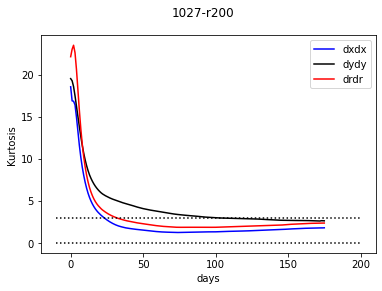

In [63]:
from scipy.stats import kurtosis
kr=kurtosis(np.log10(dxdx2[:,:]),axis=1)
plt.plot(kr[:-5],'b')
kr=kurtosis(np.log10(dydy2[:,:]),axis=1)
plt.plot(kr[:-5],'k')
kr=kurtosis(np.log10(drdr2[:,:]),axis=1)
plt.plot(kr[:-5],'r')
plt.legend(['dxdx','dydy','drdr'])
plt.plot([-10,200],[3,3],':k')
plt.plot([-10,200],[0,0],':k')
plt.ylabel('Kurtosis')
plt.xlabel('days')
plt.suptitle("1027-r200")
#plt.xscale('log')
#plt.yscale('log')

In [62]:
### autocorrelation



rx = np.zeros((len((urms[0,:,0])),len((urms[0,0,:]))))
ry = np.zeros((len((urms[0,:,0])),len((urms[0,0,:]))))
for t in np.arange(len((urms[0,:,0]))):
    for c in np.arange(len((urms[0,0,:]))):
    #print(t)
        rx0=np.mean(urms[:,0,c]*urms[:,t,c],axis=0)
        rxt=np.mean(urms[:,0,c]*urms[:,0,c],axis=0)
        rx[t,c]=rx0/rxt
        
        ry0=np.mean(vrms[:,0,c]*vrms[:,t,c],axis=0)
        ryt=np.mean(vrms[:,0,c]*vrms[:,0,c],axis=0)
        ry[t,c]=ry0/ryt

/global/cfs/cdirs/e3sm/software/anaconda_envs/base/envs/e3sm_unified_1.4.0/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  
/global/cfs/cdirs/e3sm/software/anaconda_envs/base/envs/e3sm_unified_1.4.0/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


In [65]:
rx.shape

(181, 2201)

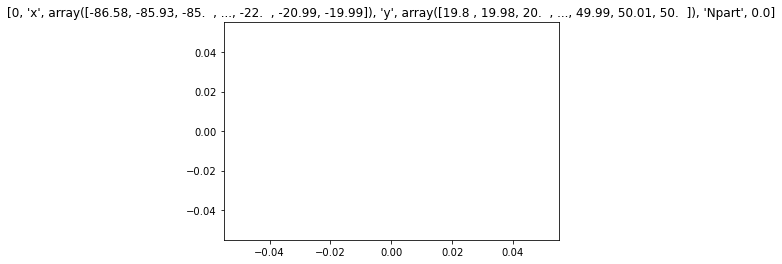

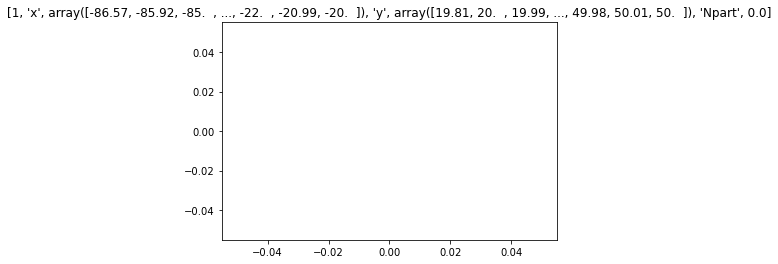

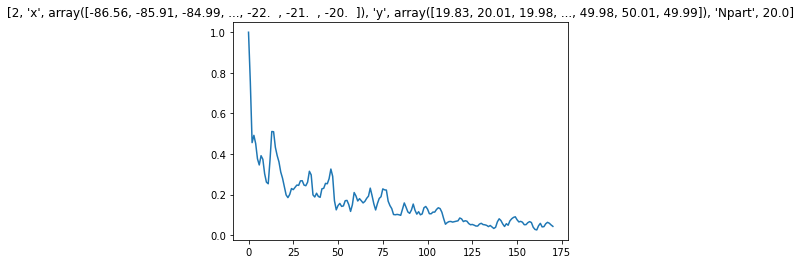

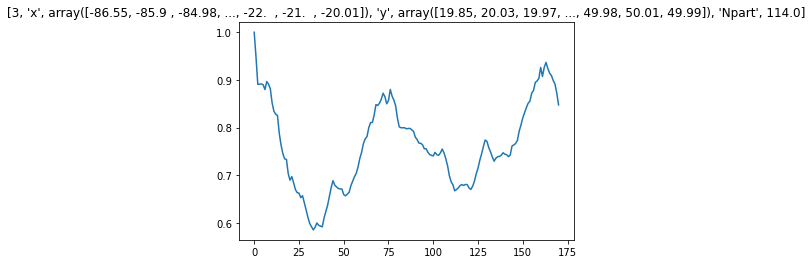

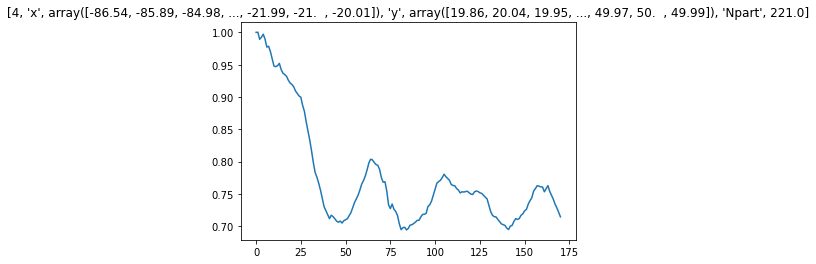

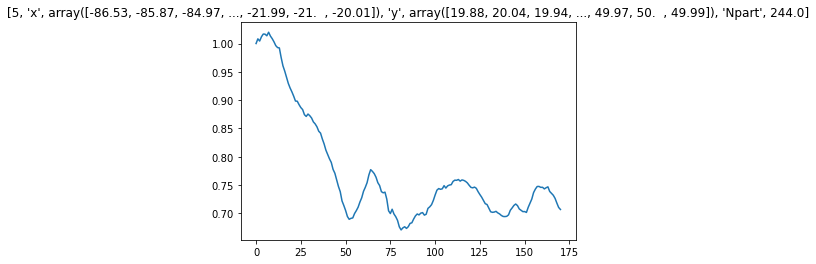

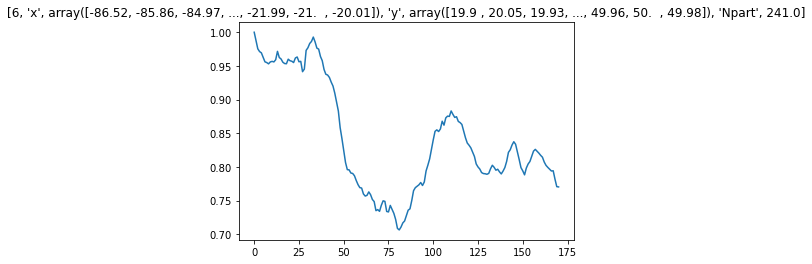

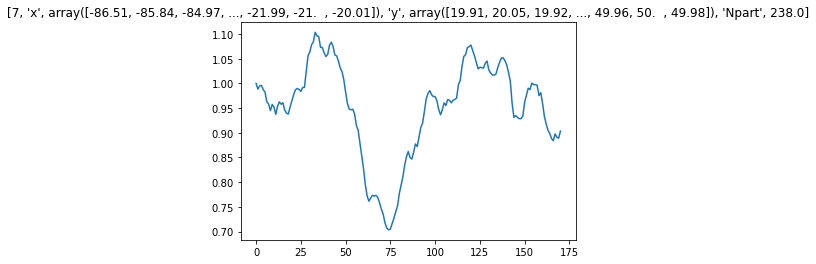

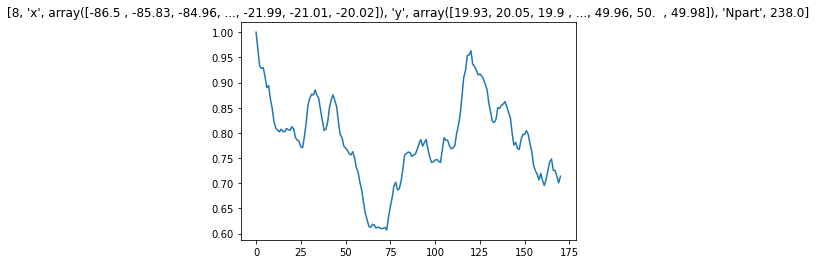

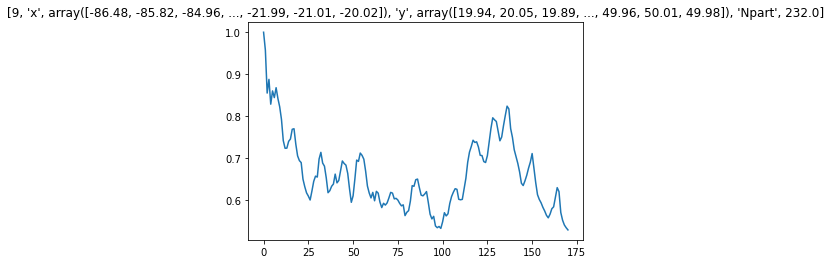

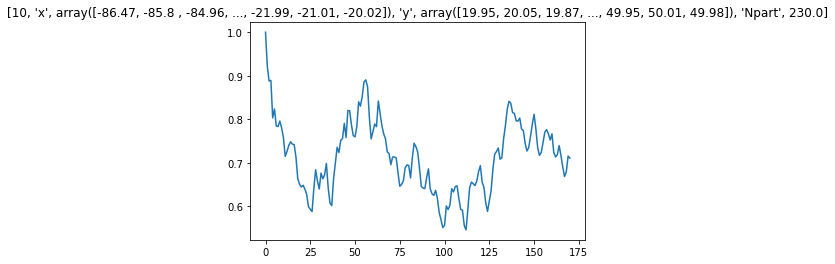

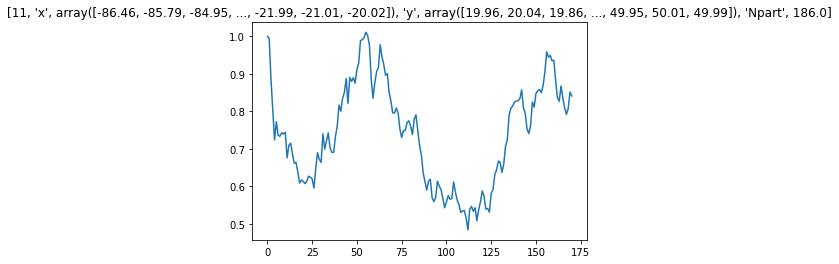

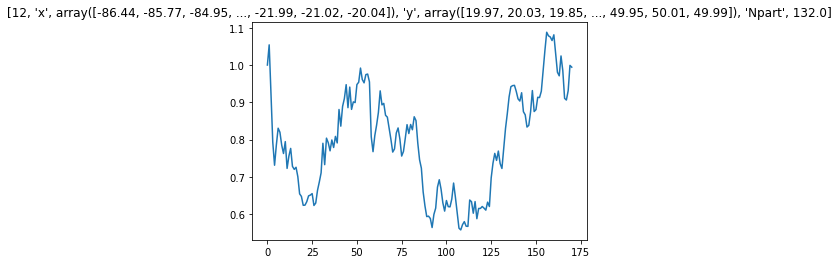

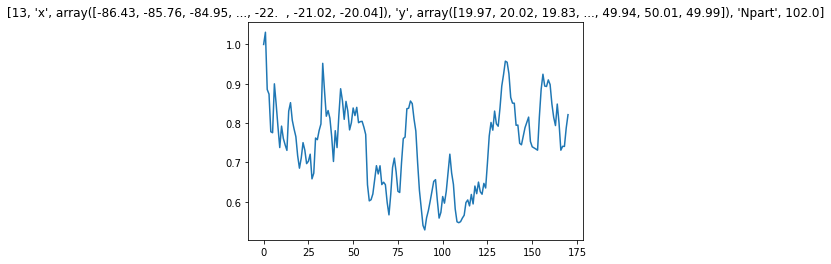

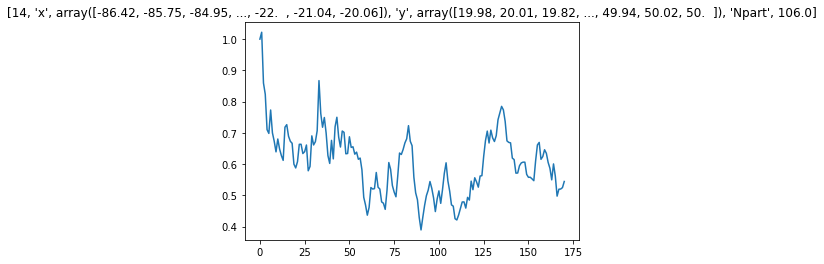

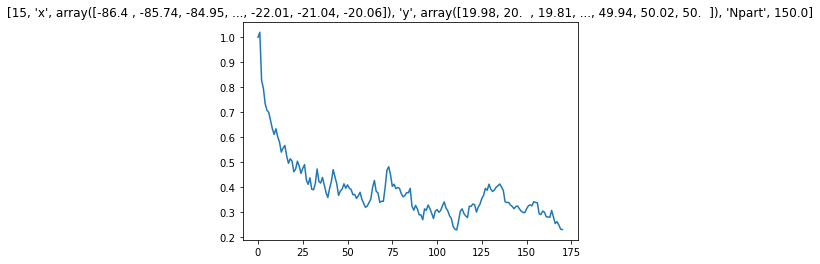

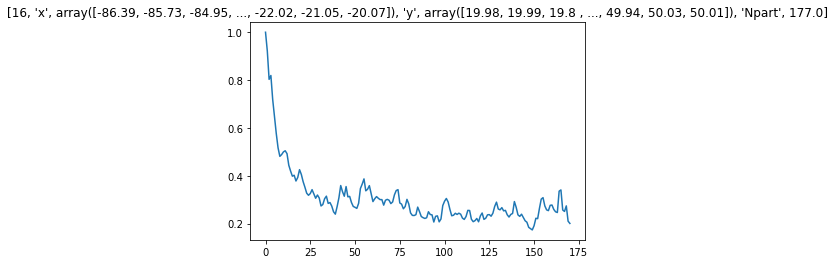

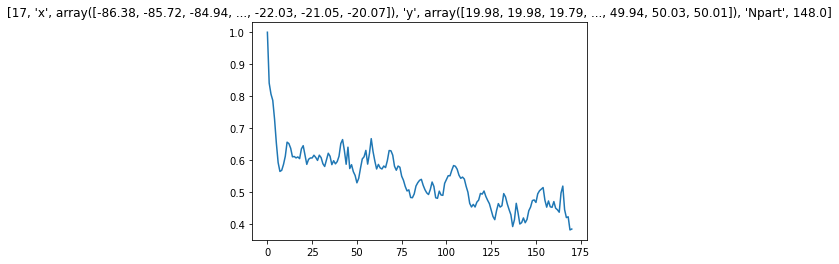

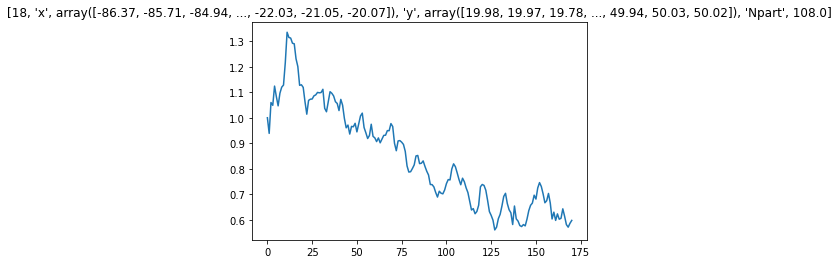

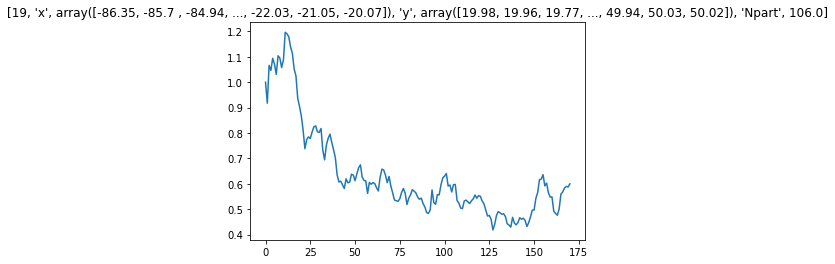

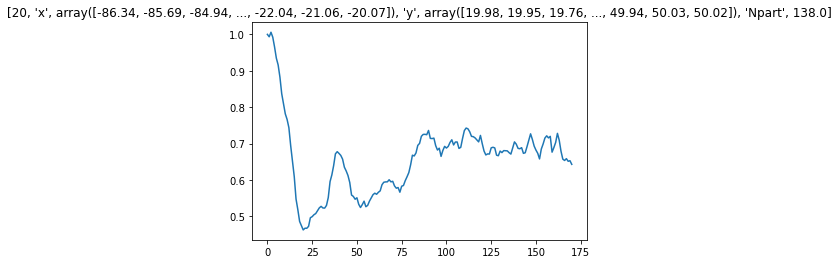

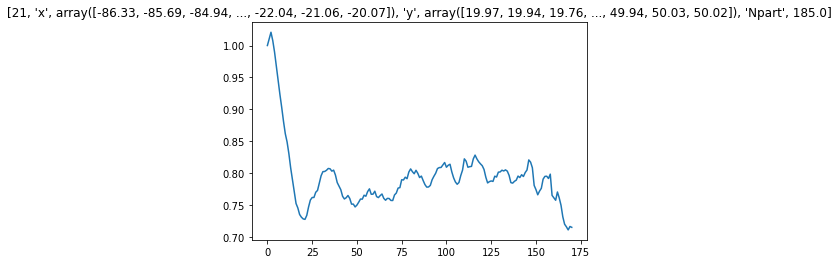

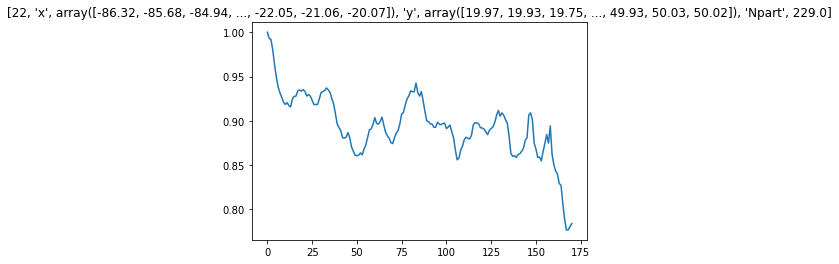

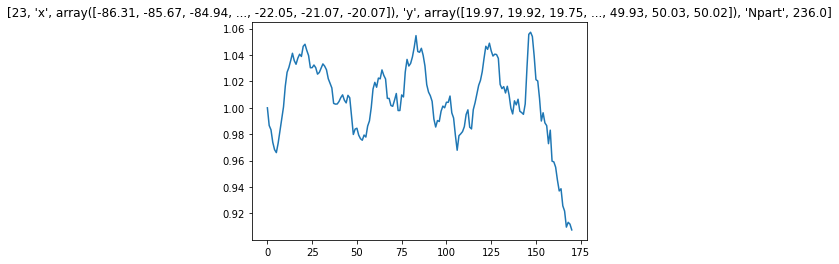

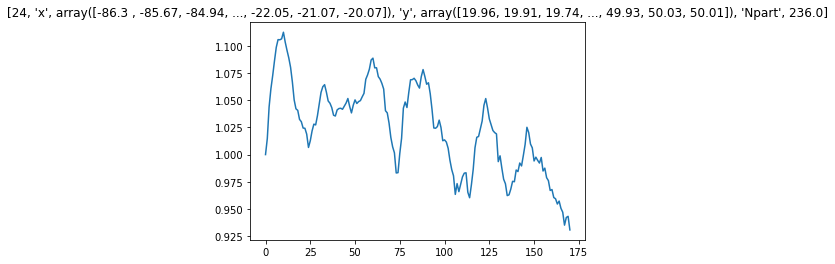

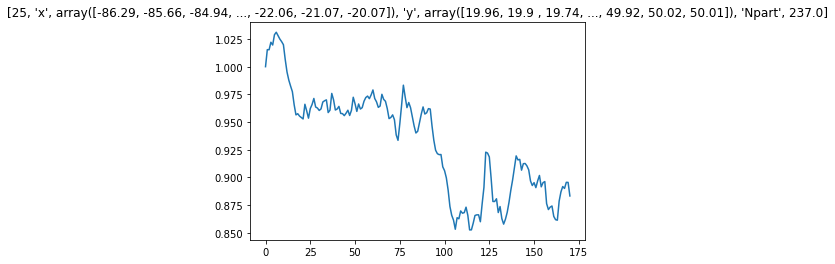

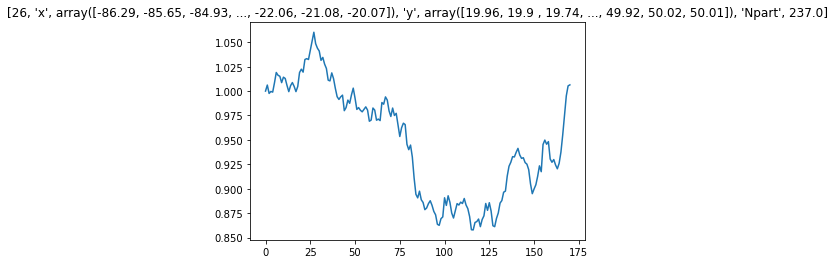

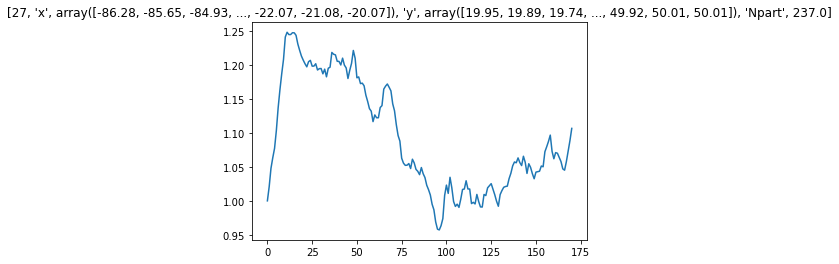

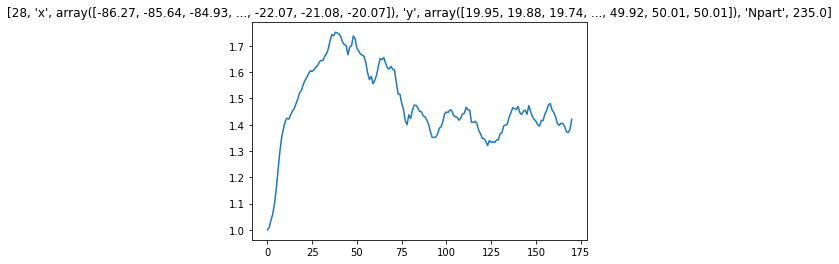

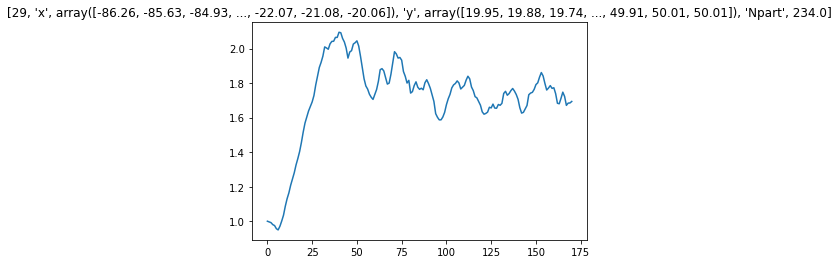

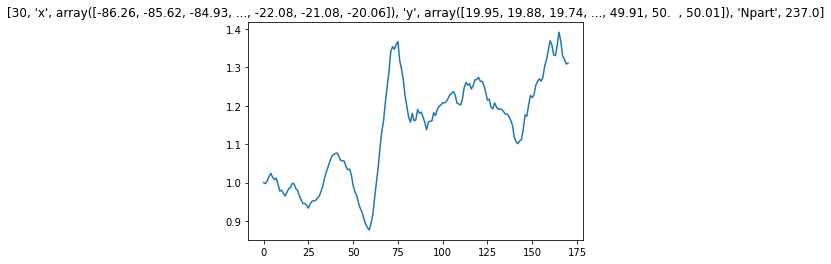

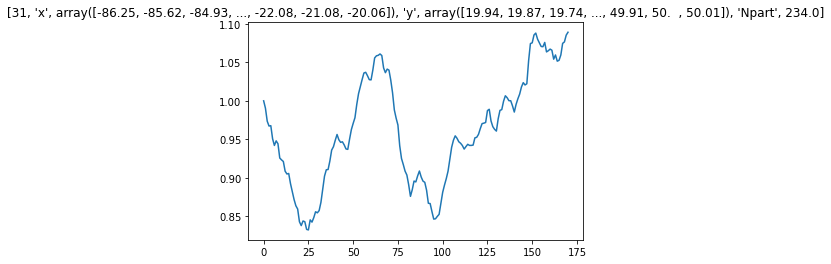

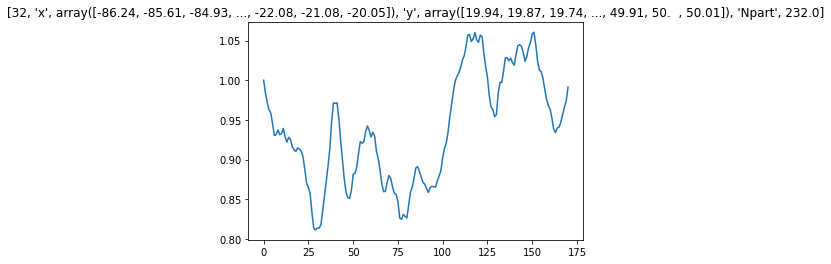

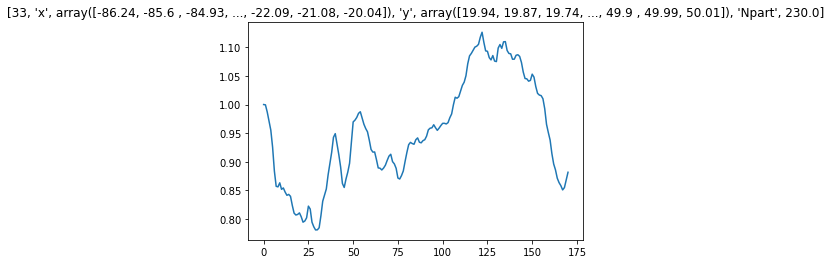

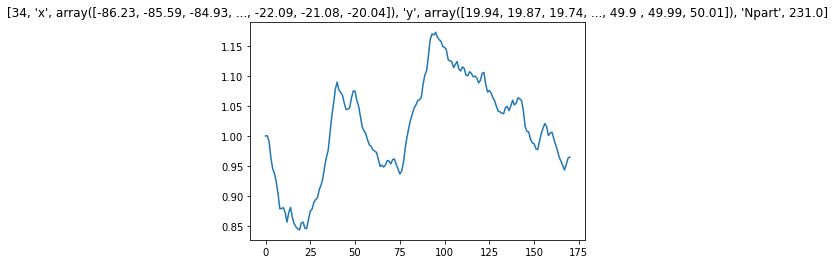

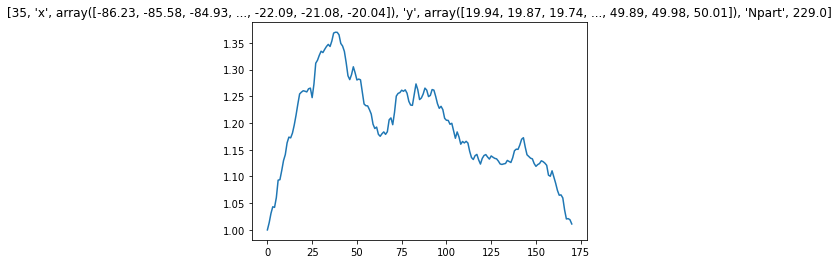

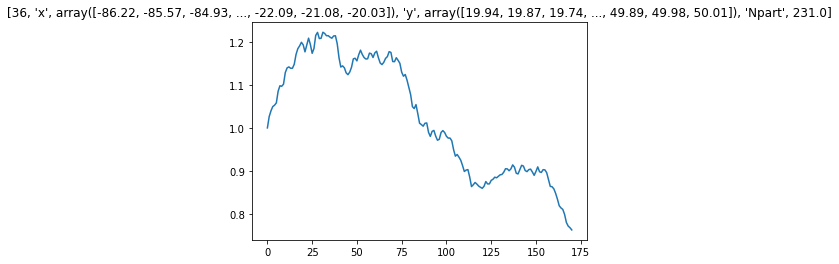

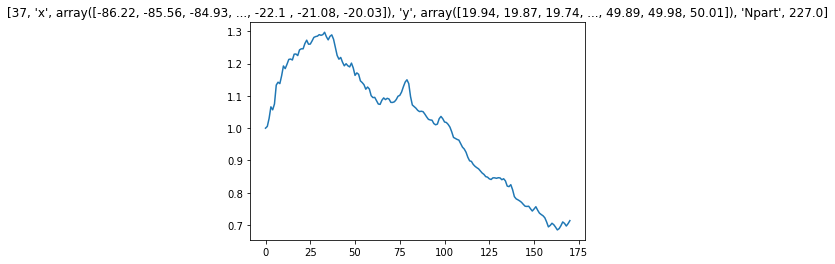

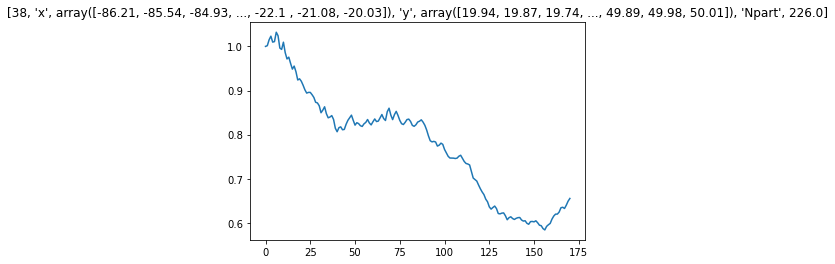

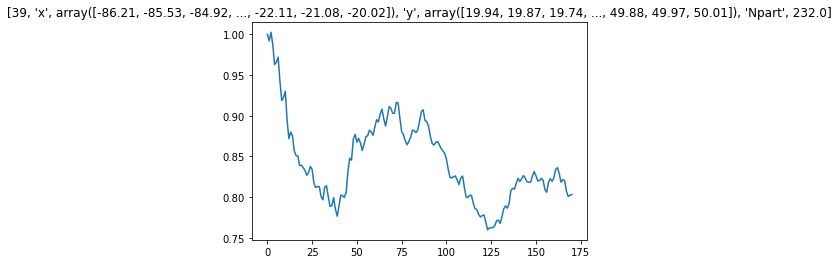

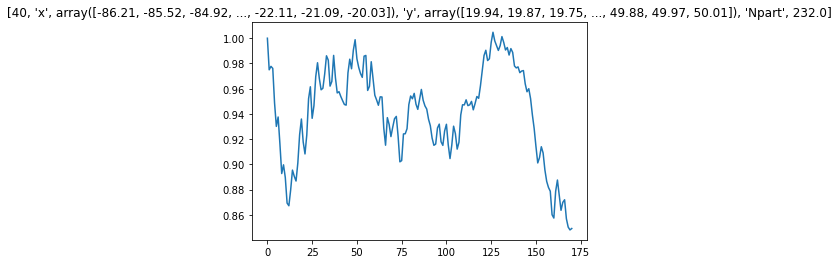

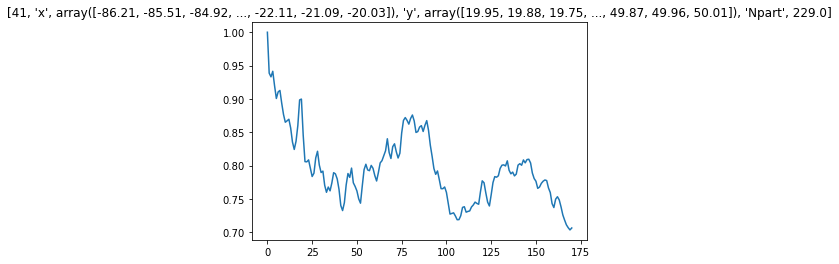

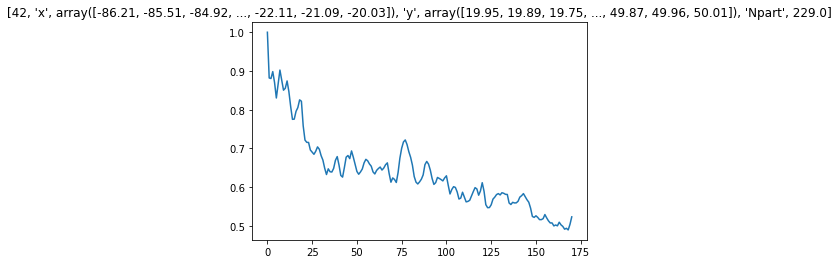

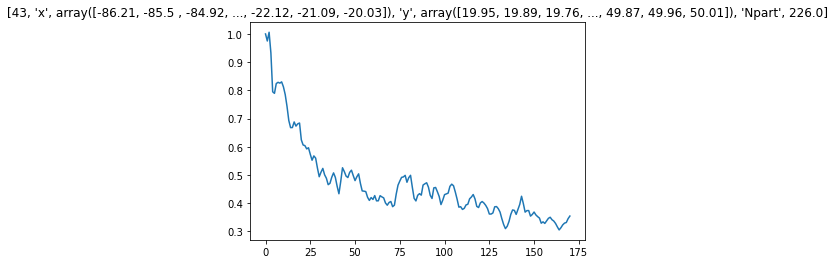

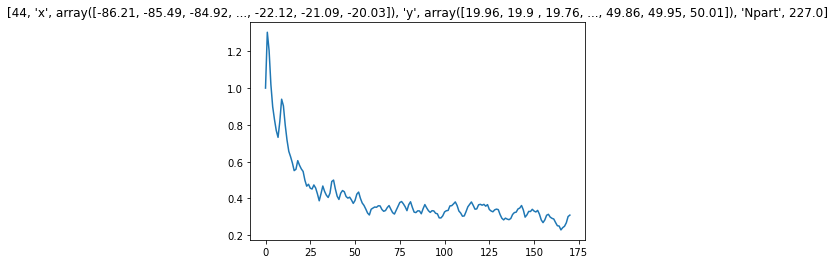

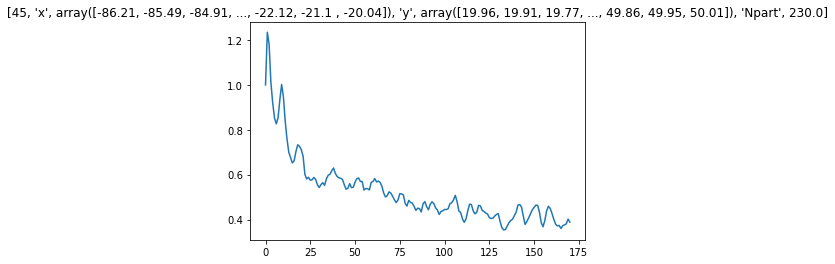

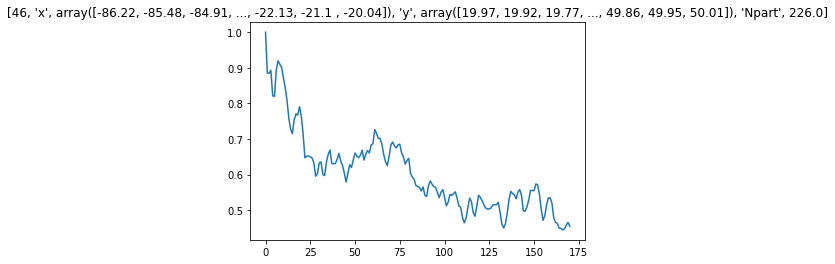

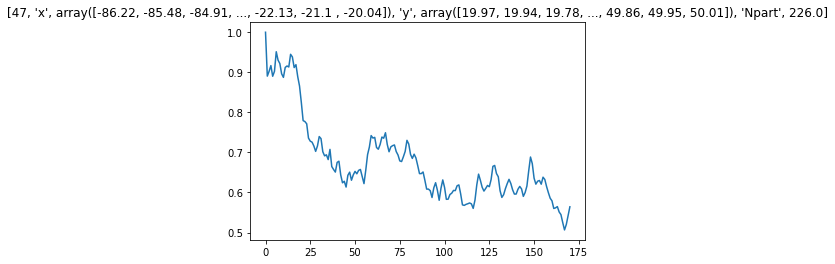

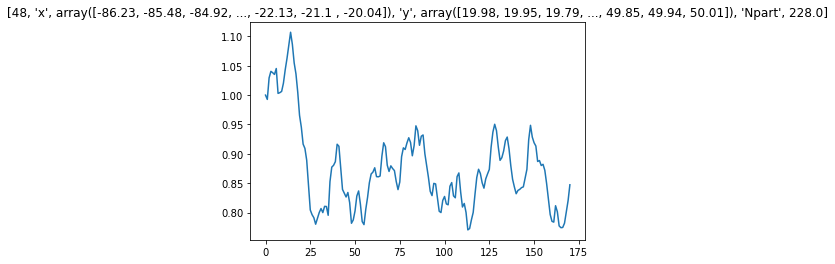

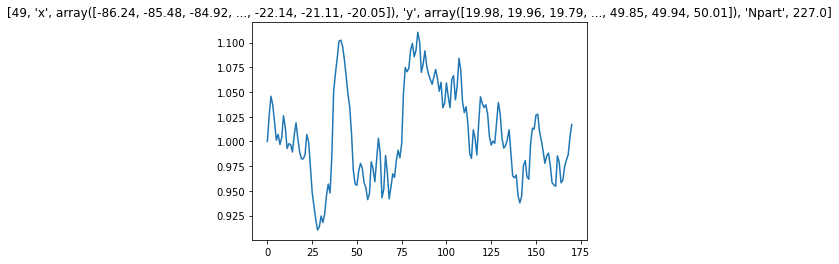

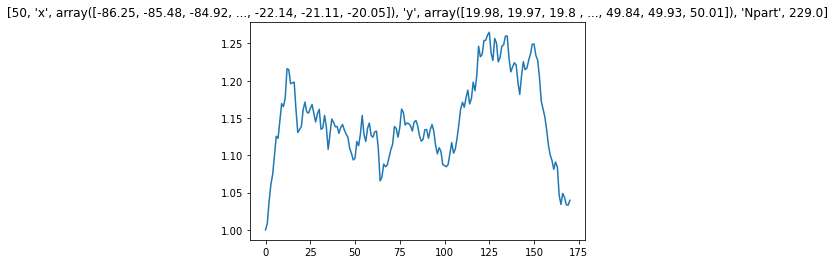

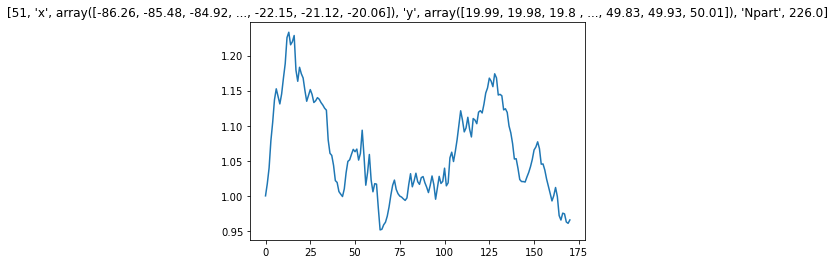

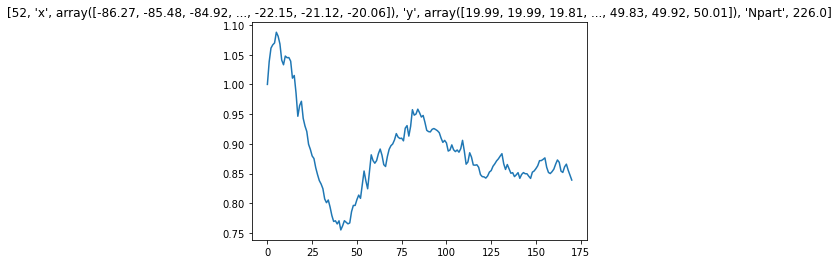

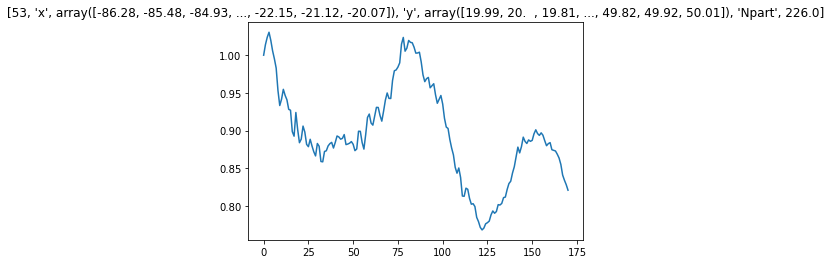

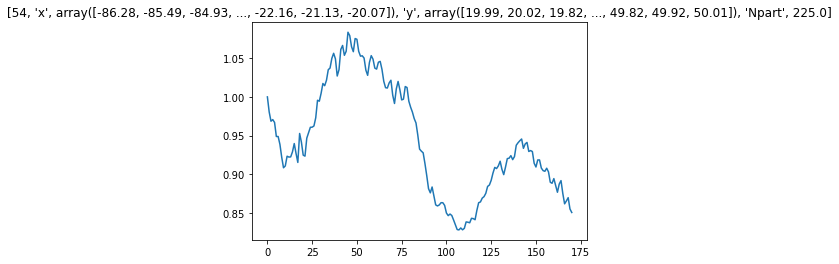

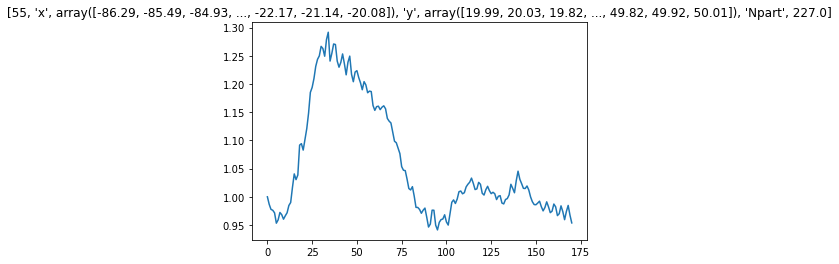

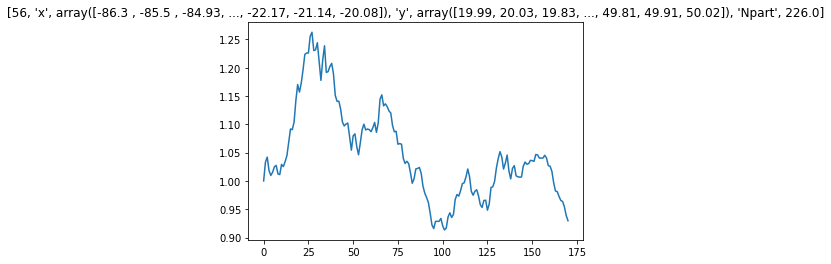

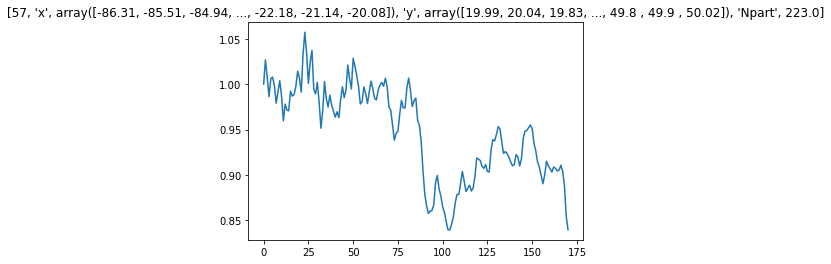

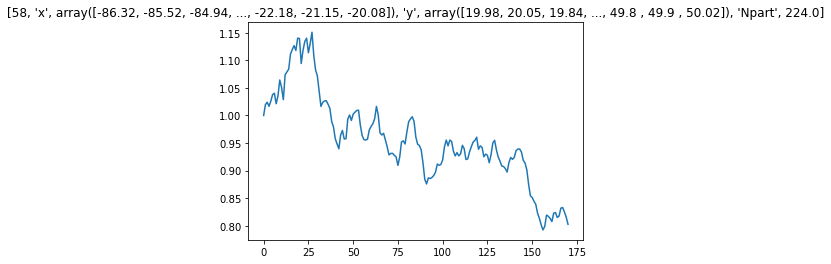

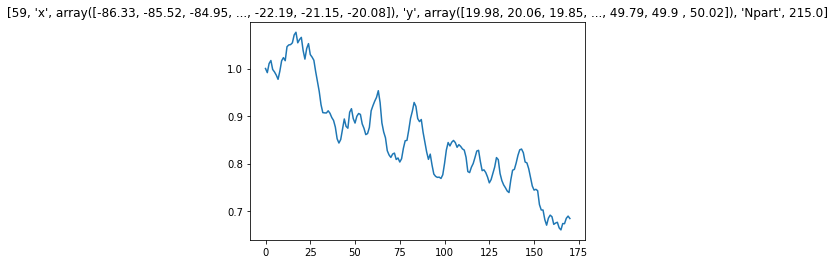

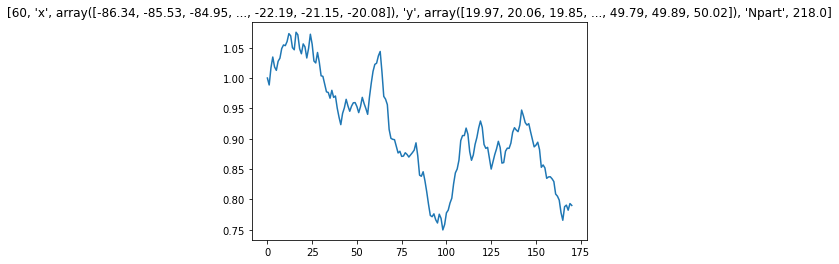

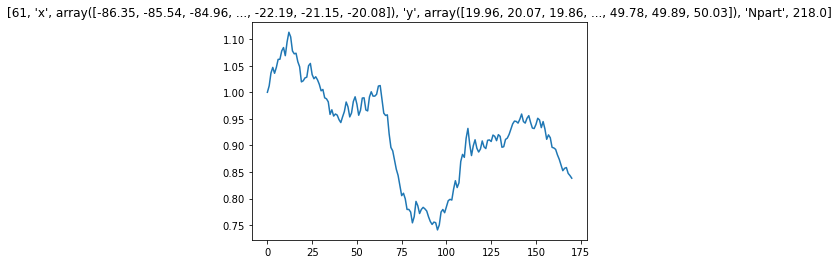

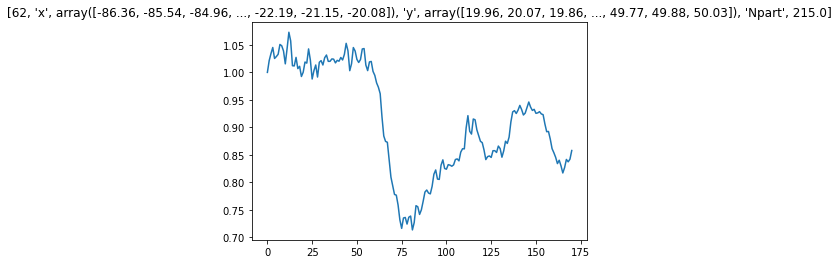

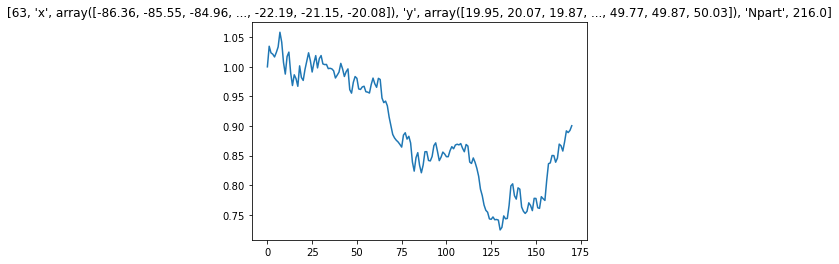

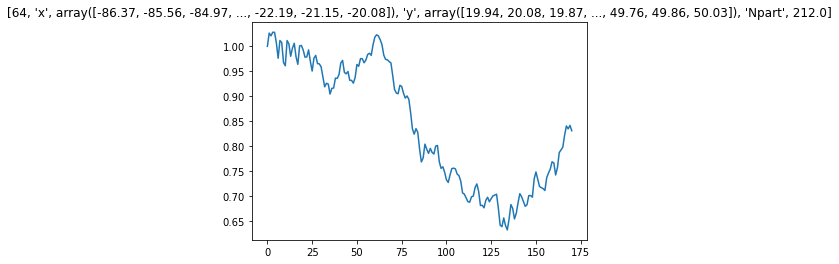

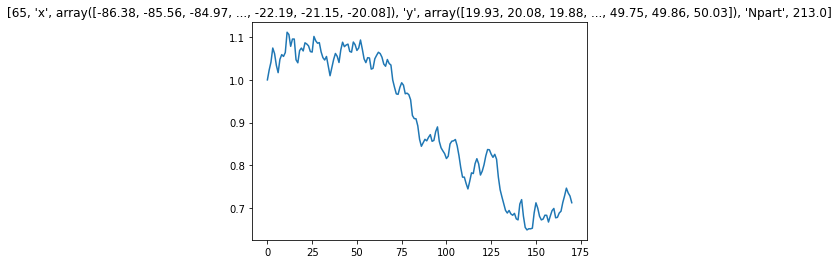

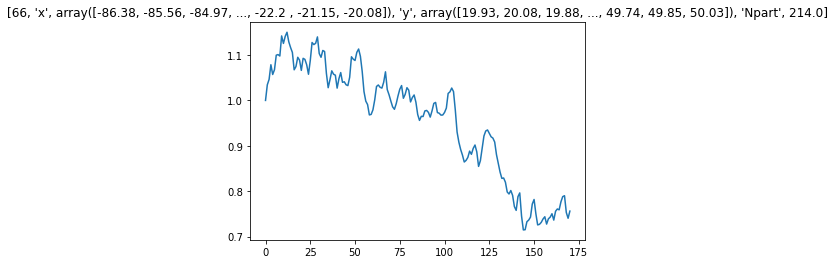

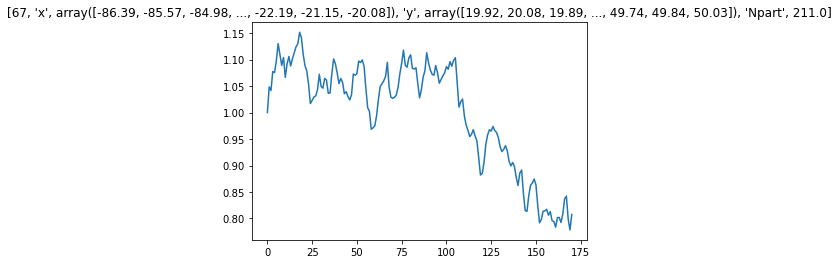

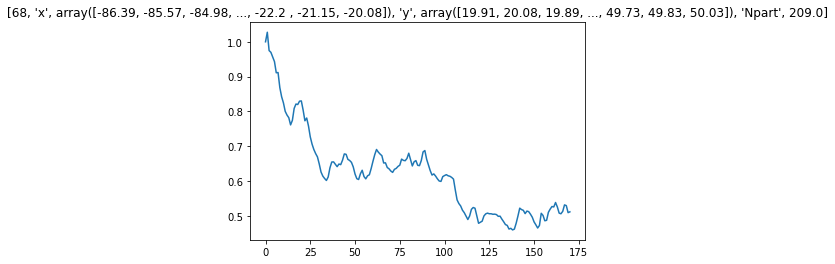

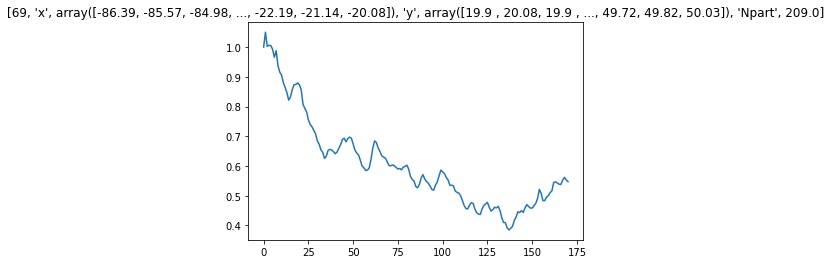

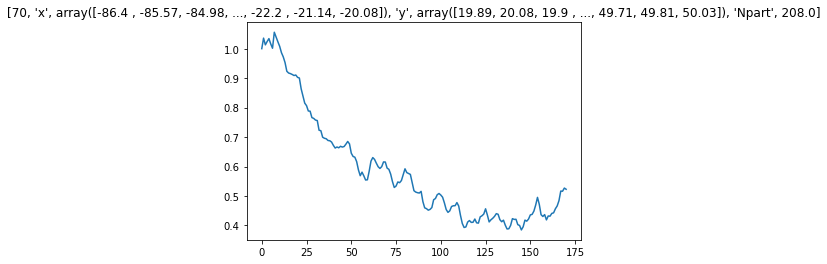

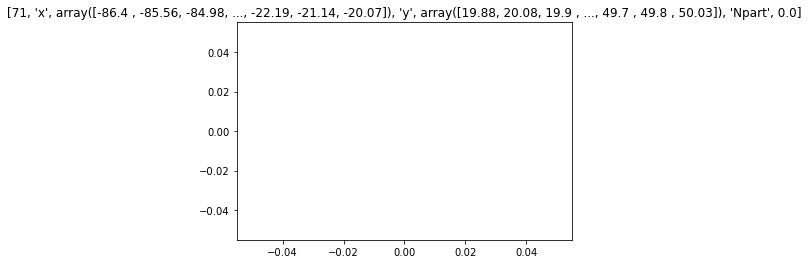

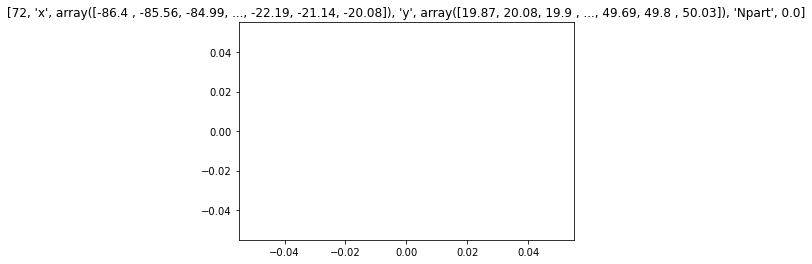

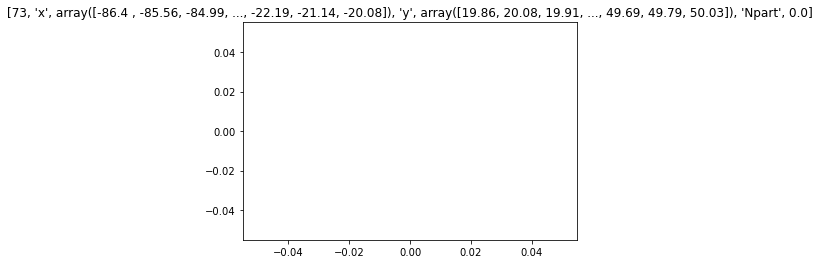

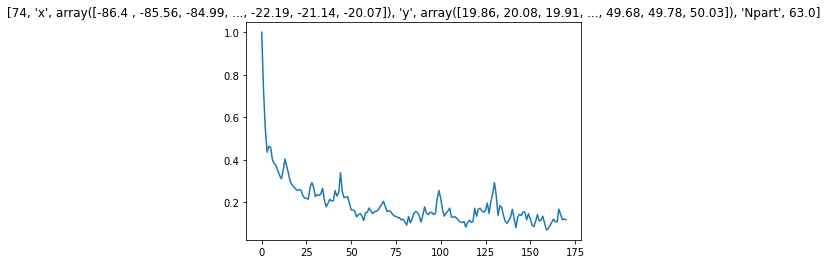

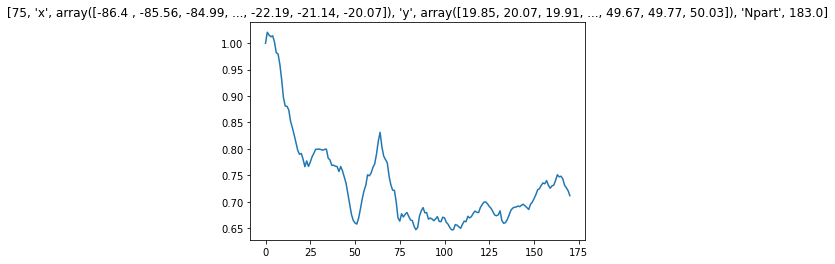

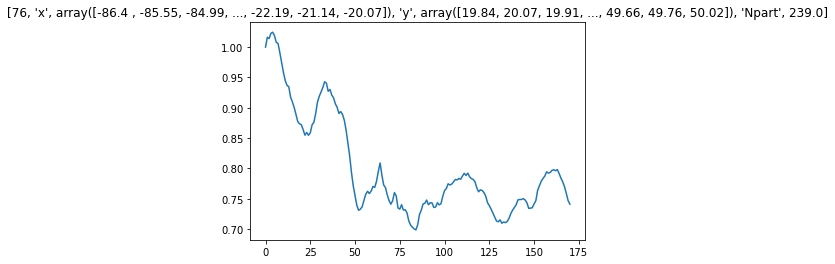

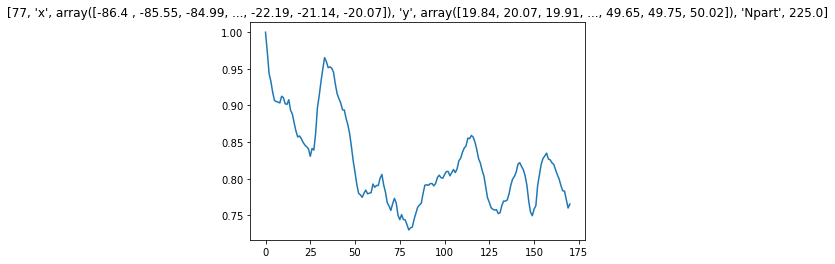

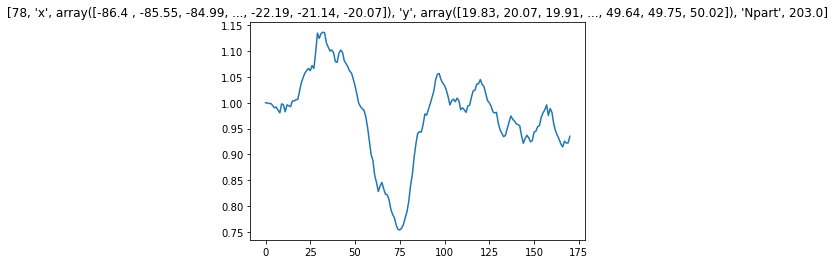

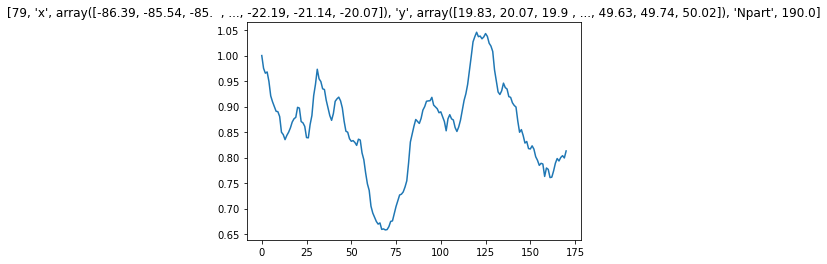

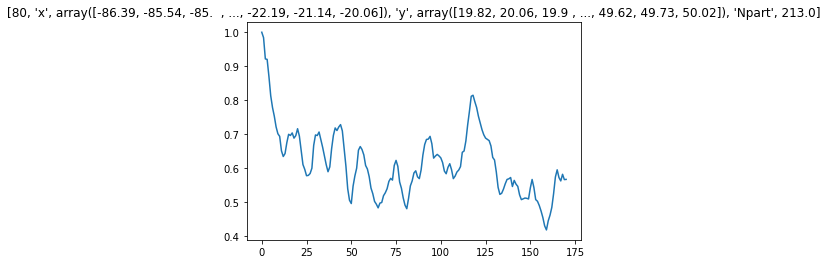

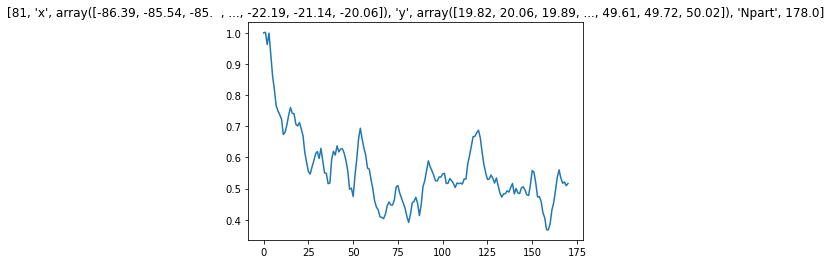

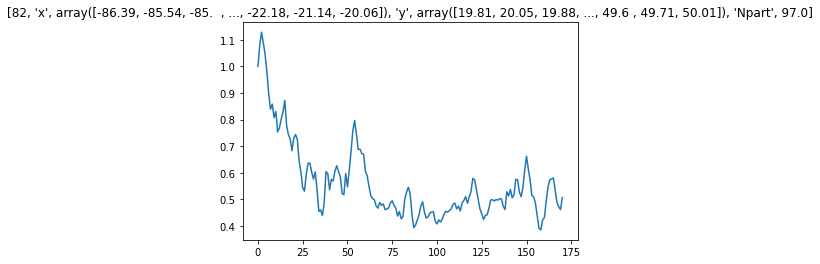

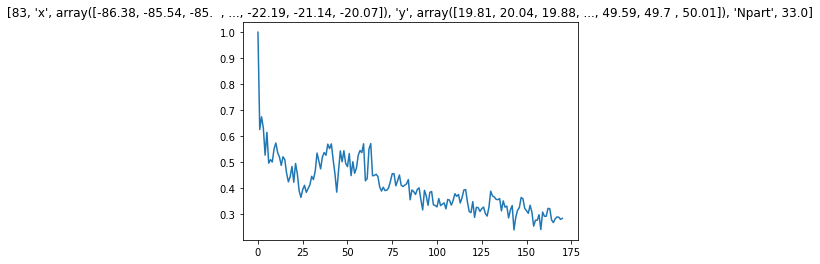

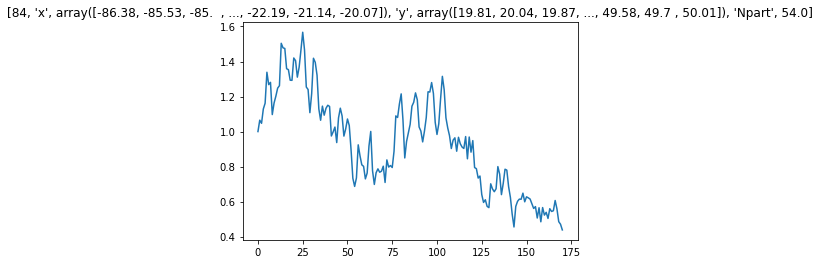

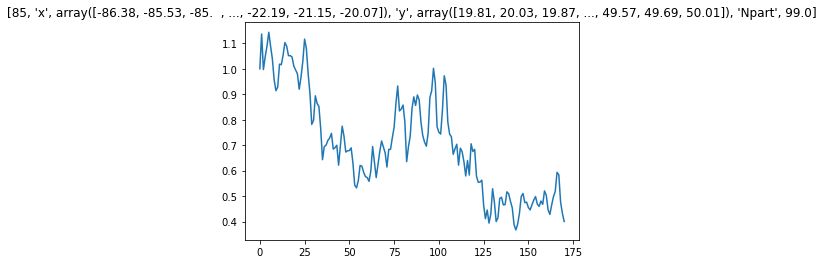

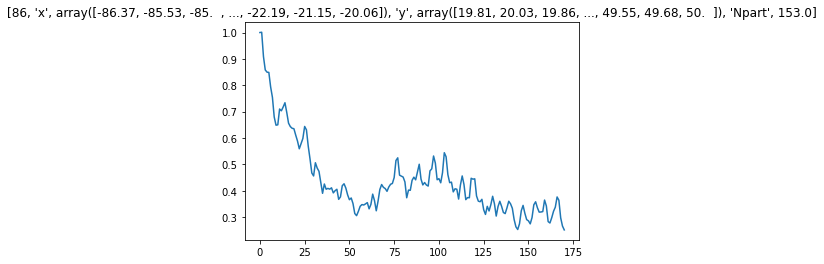

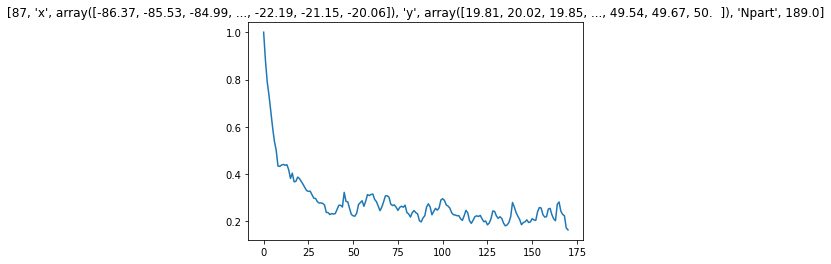

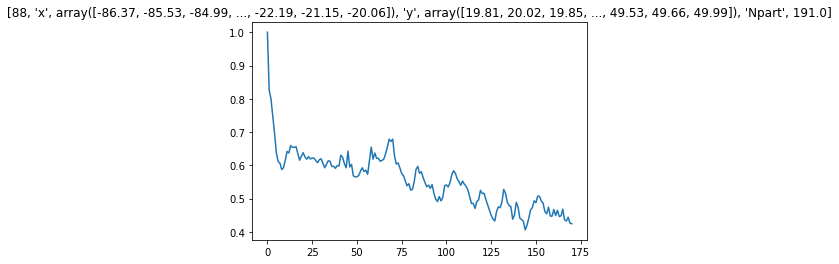

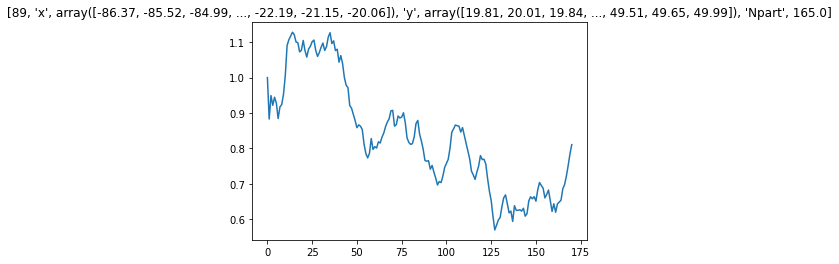

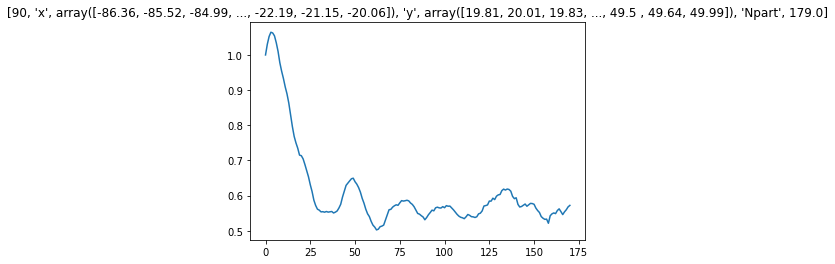

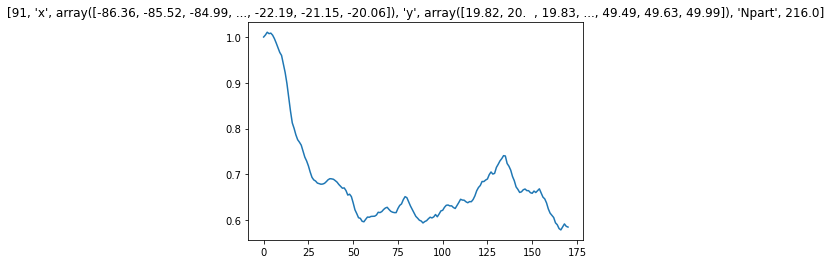

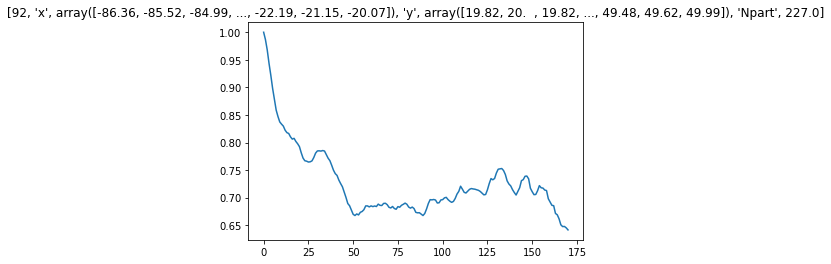

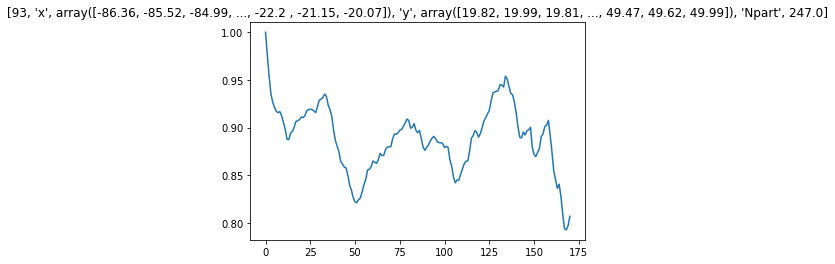

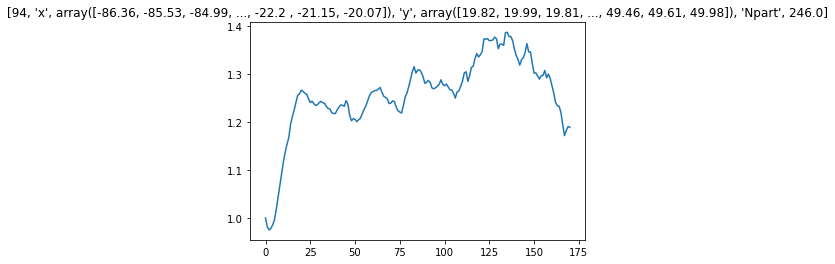

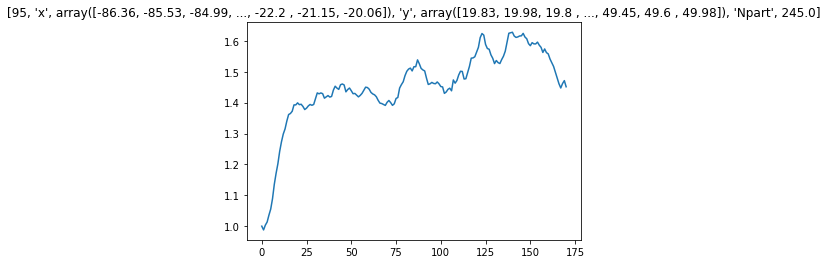

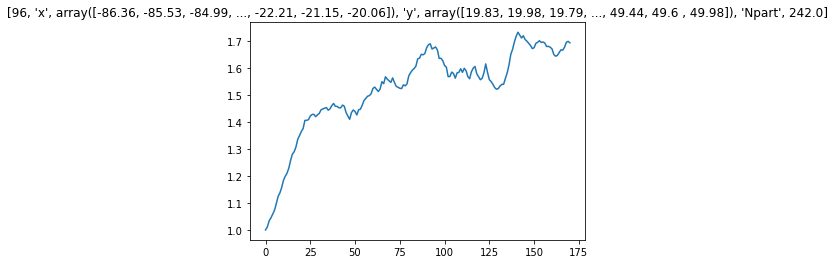

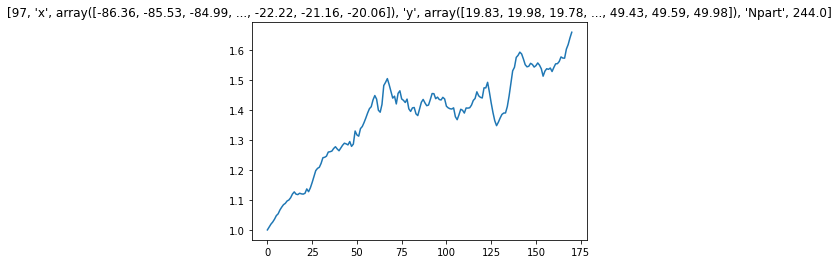

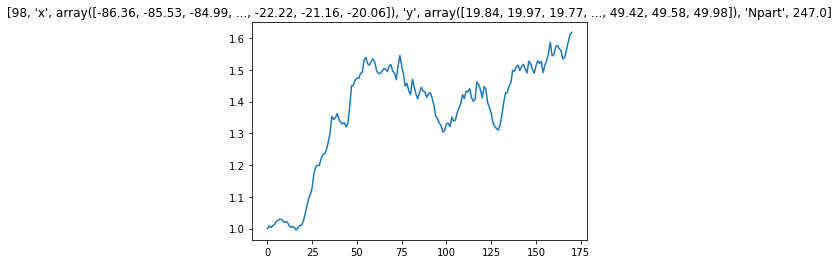

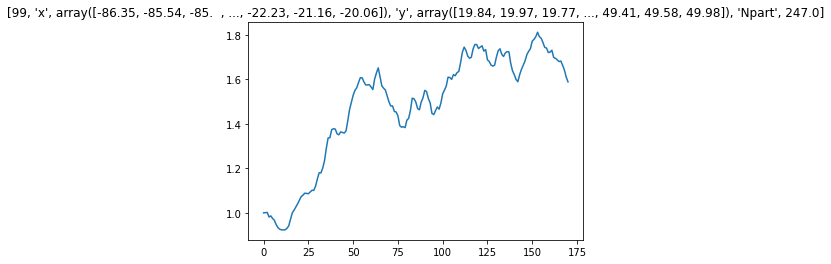

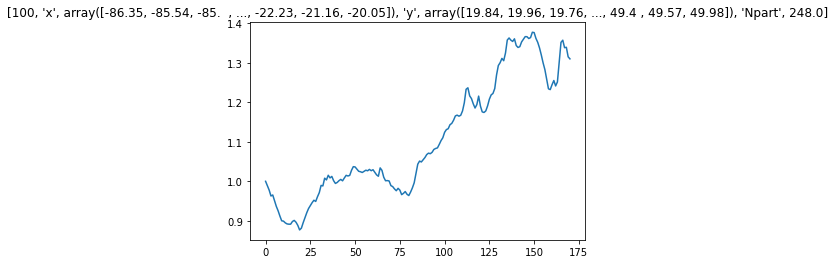

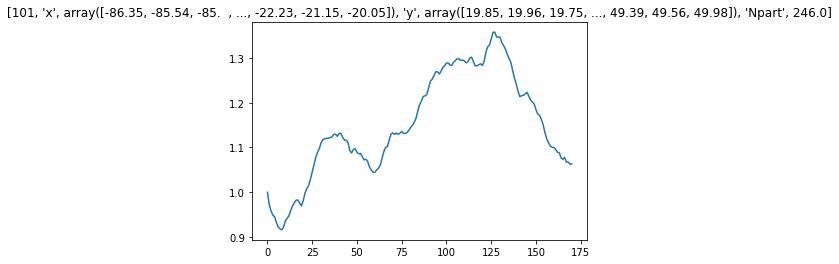

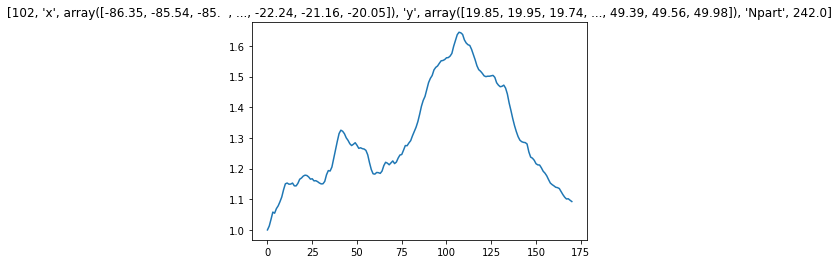

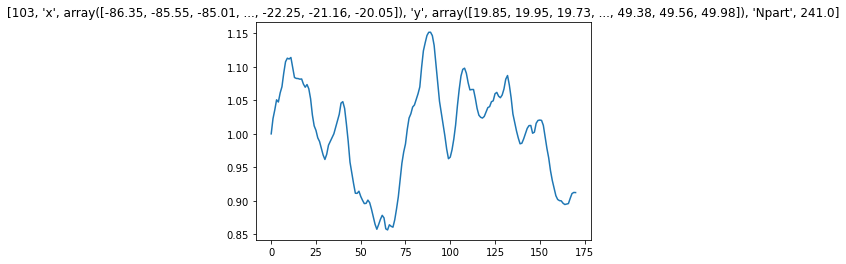

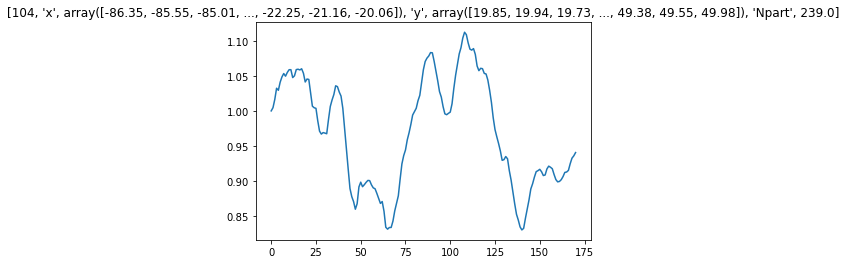

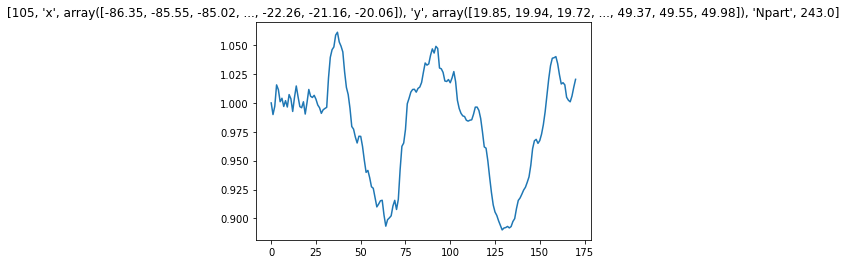

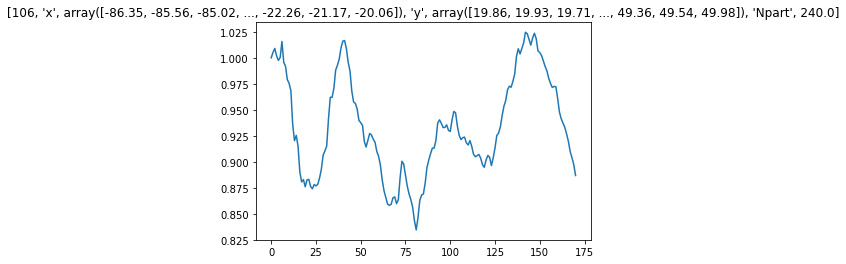

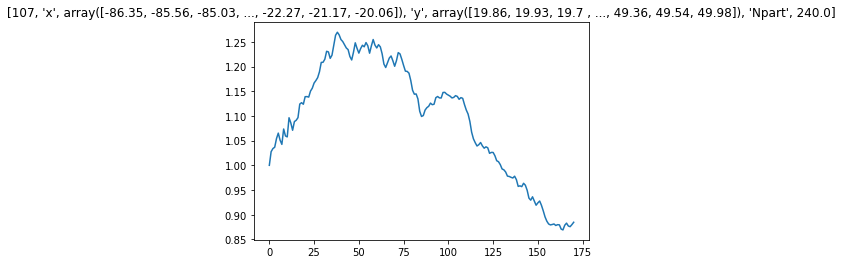

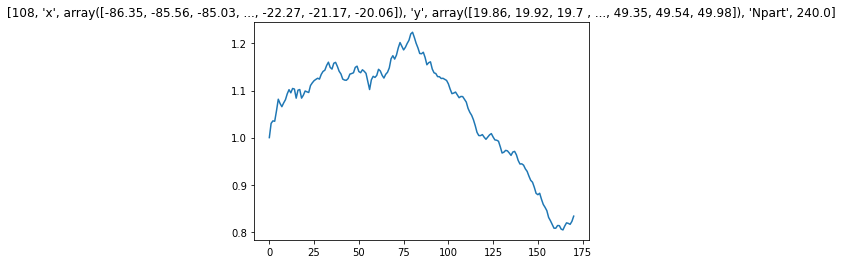

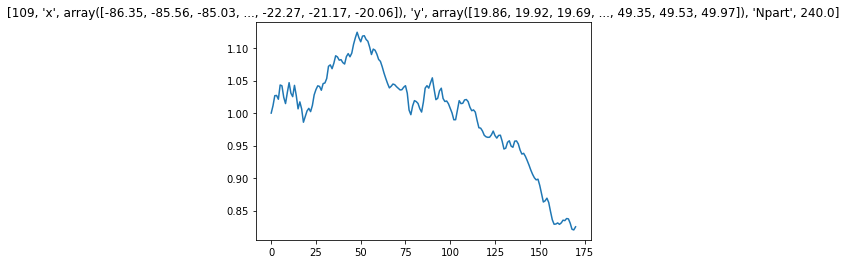

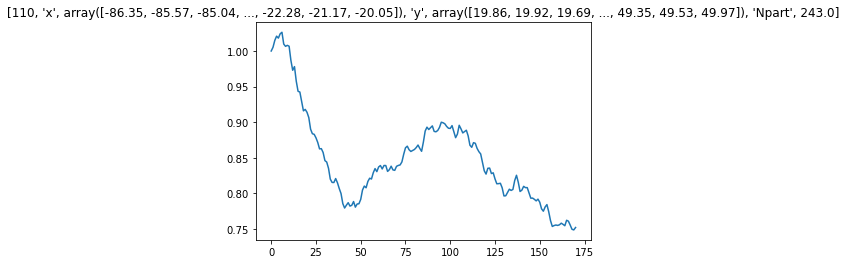

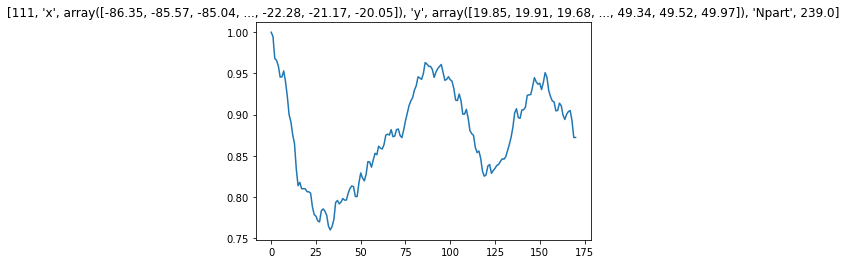

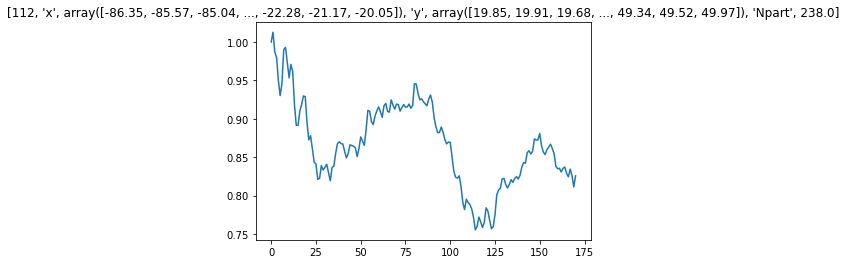

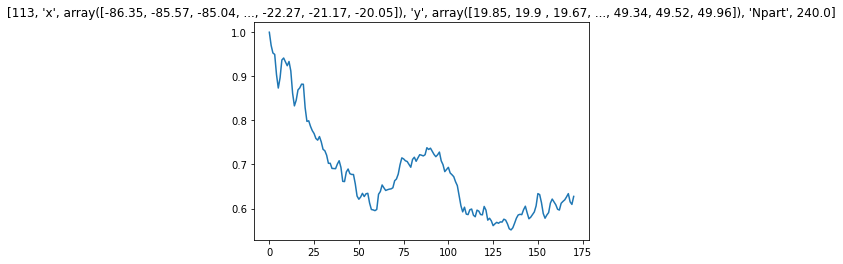

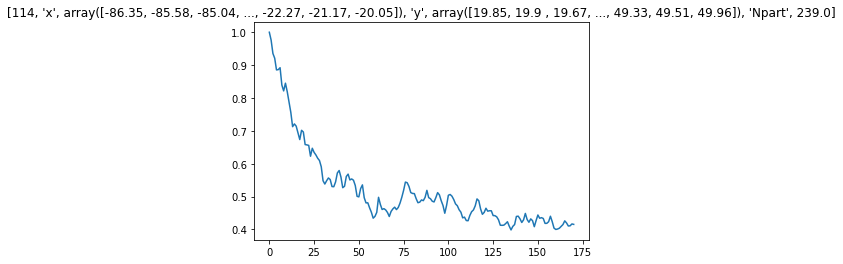

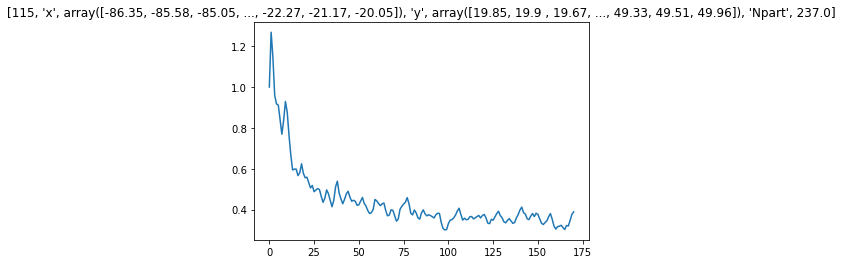

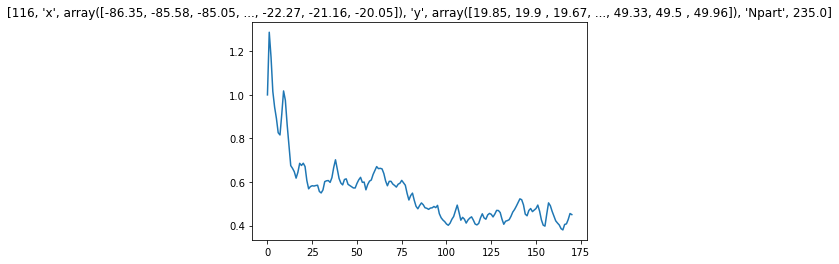

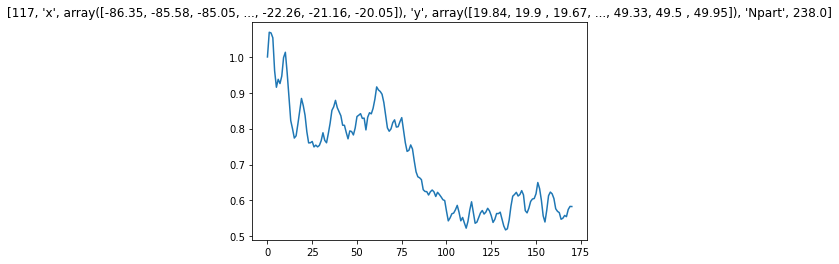

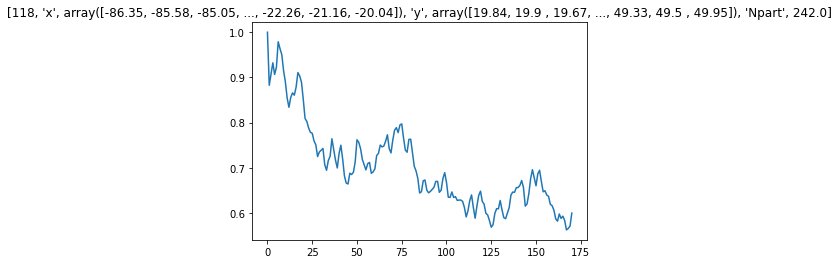

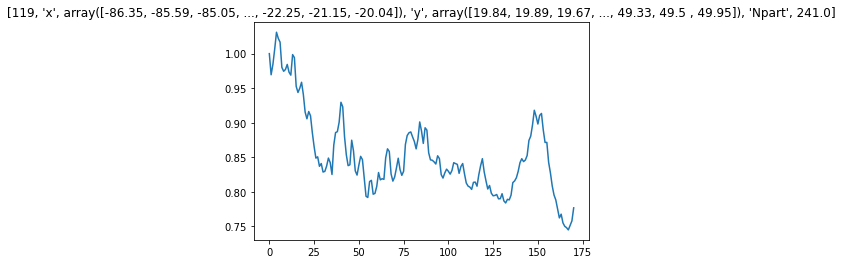

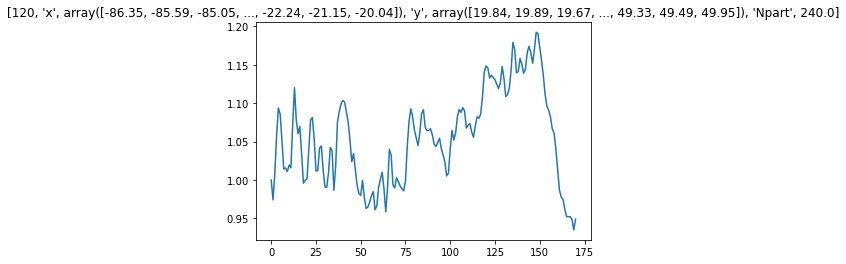

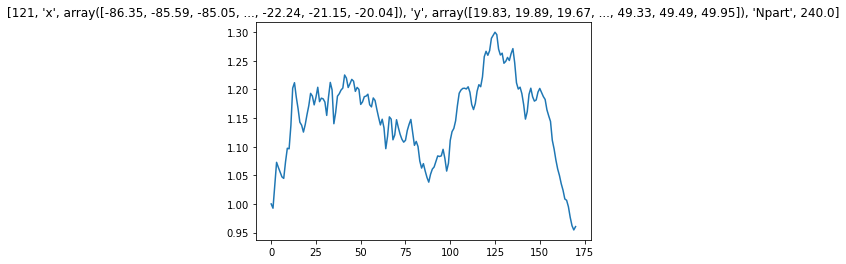

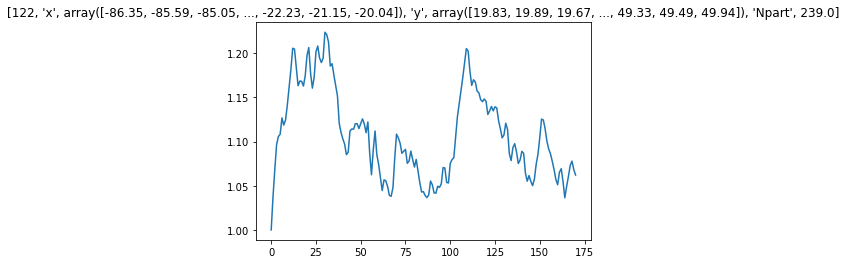

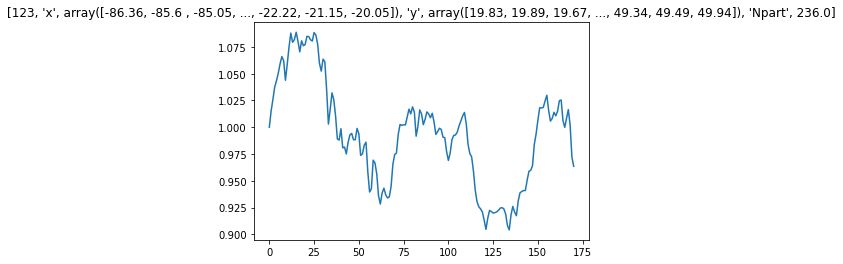

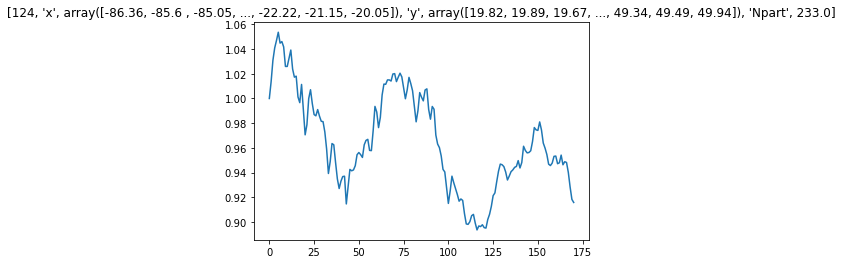

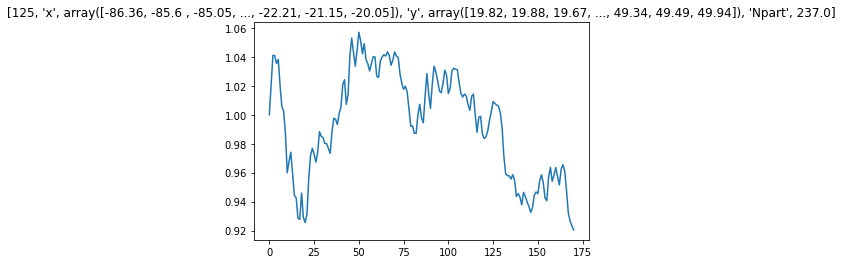

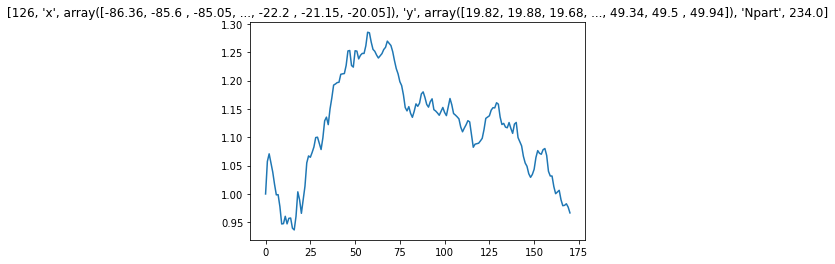

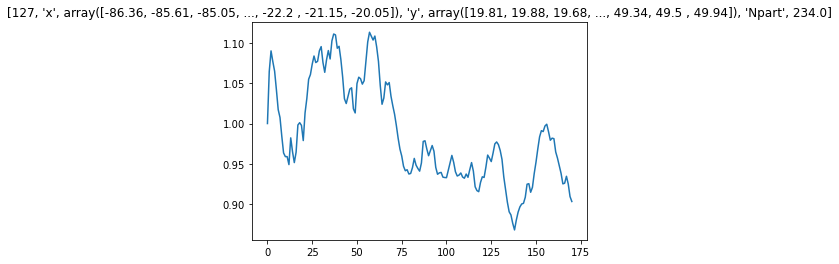

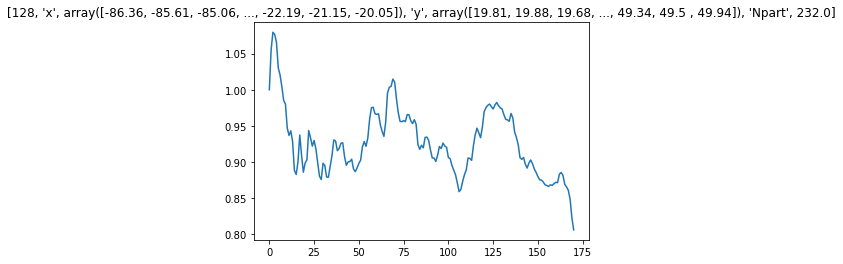

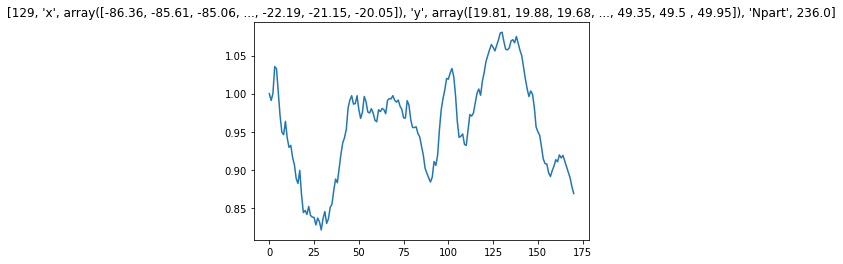

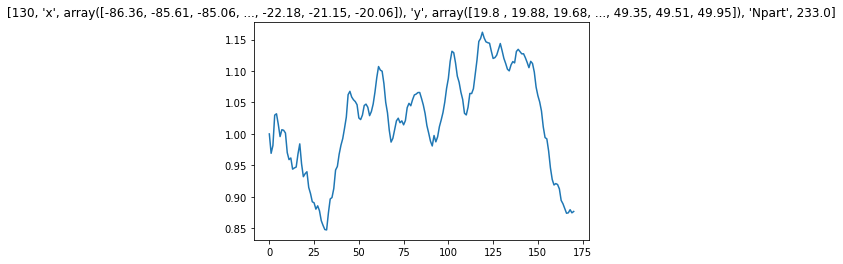

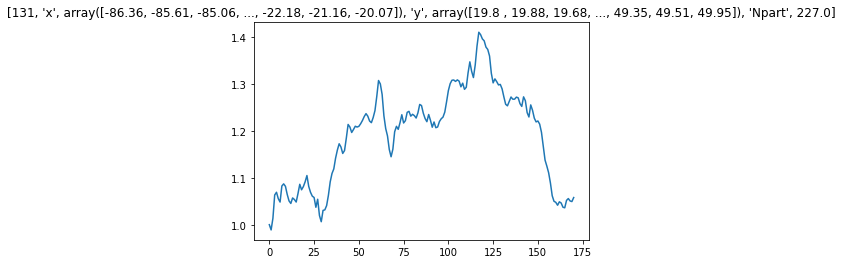

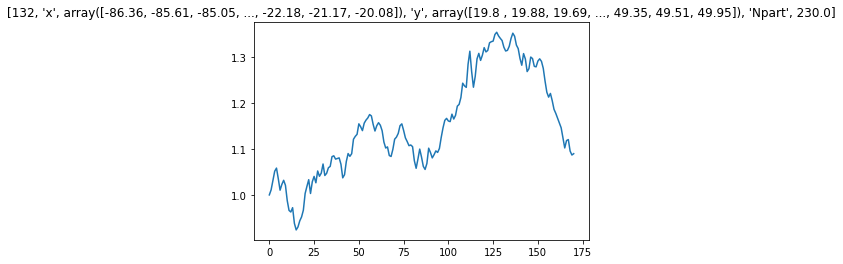

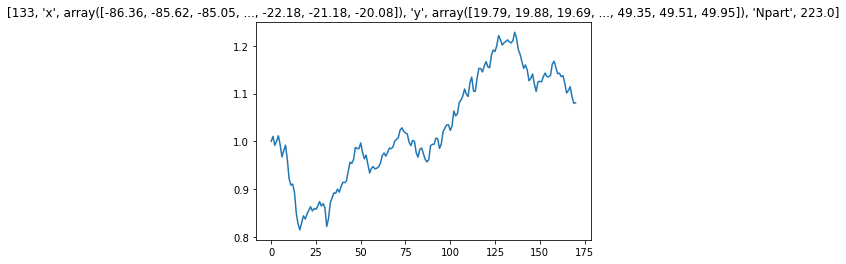

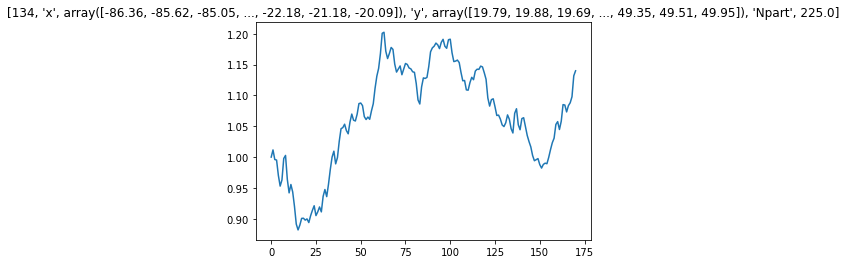

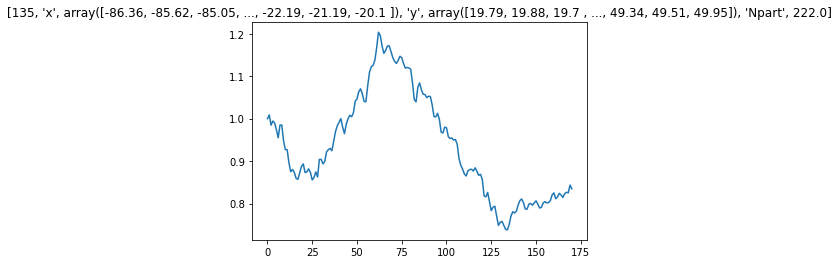

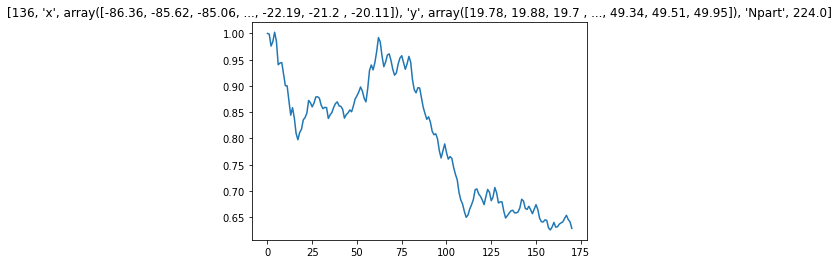

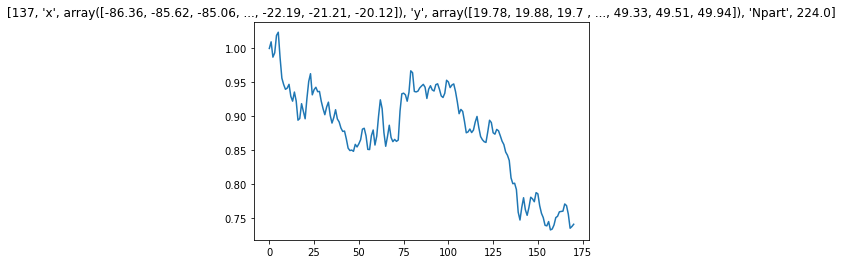

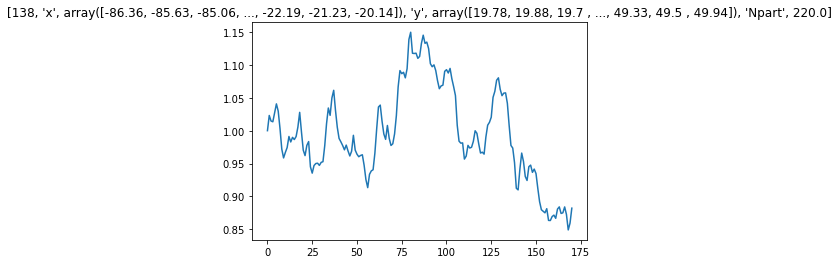

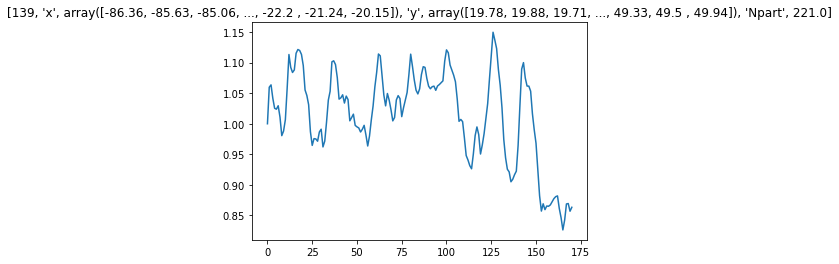

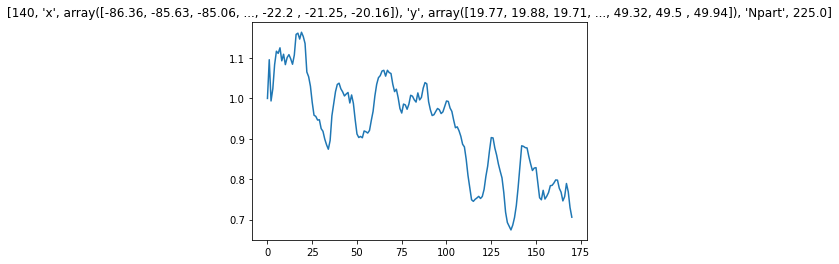

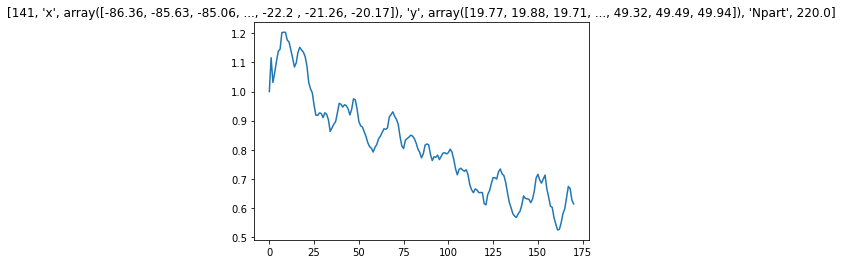

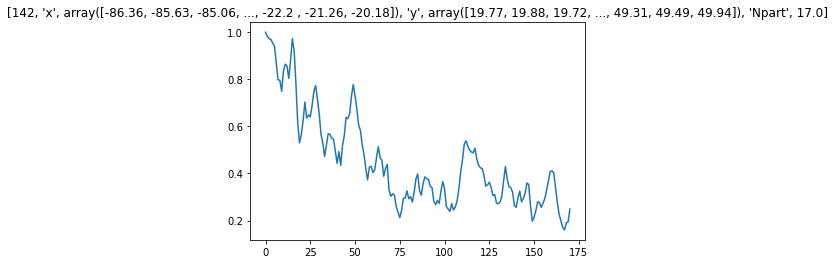

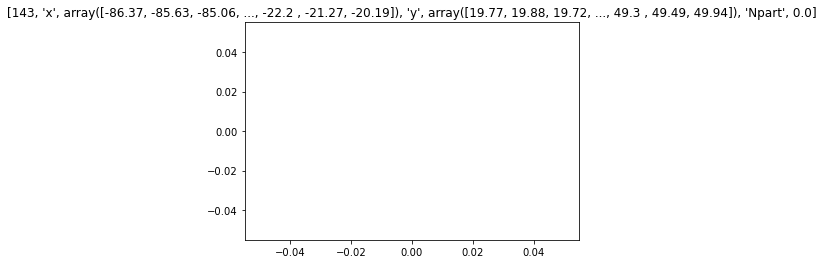

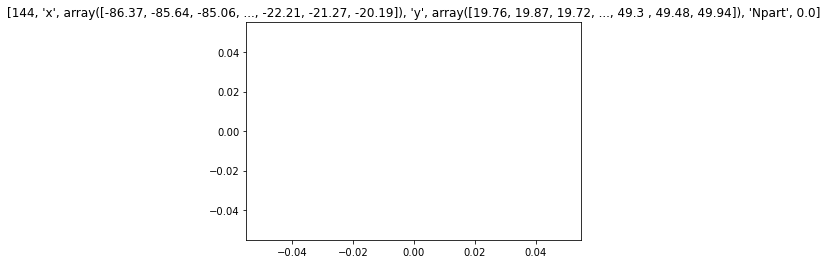

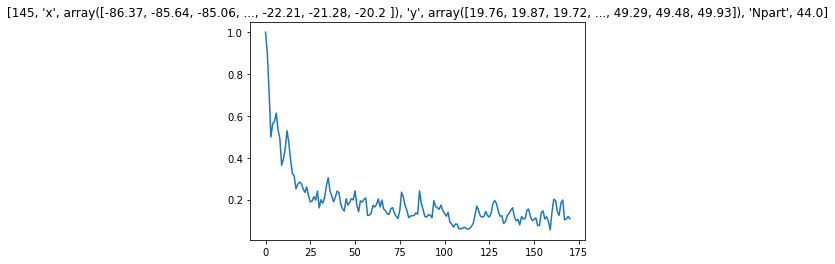

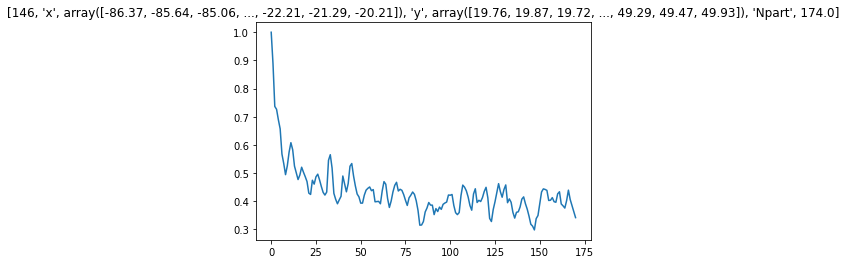

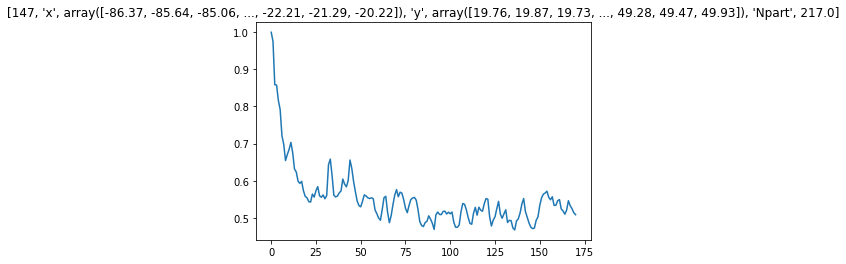

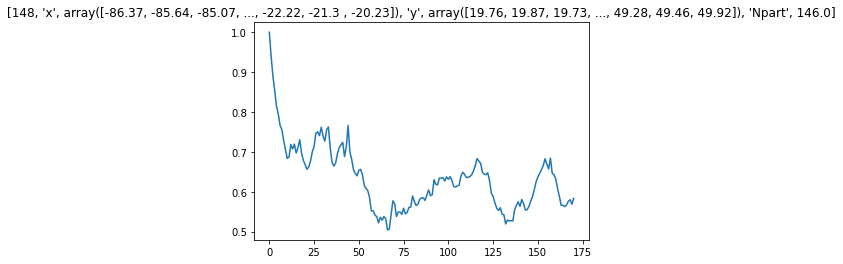

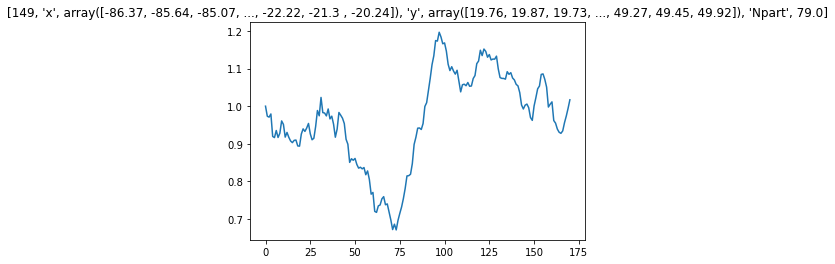

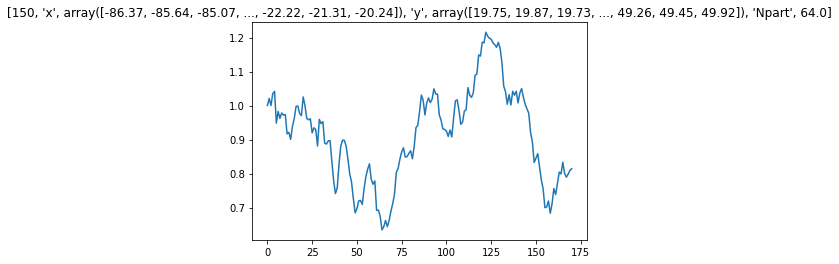

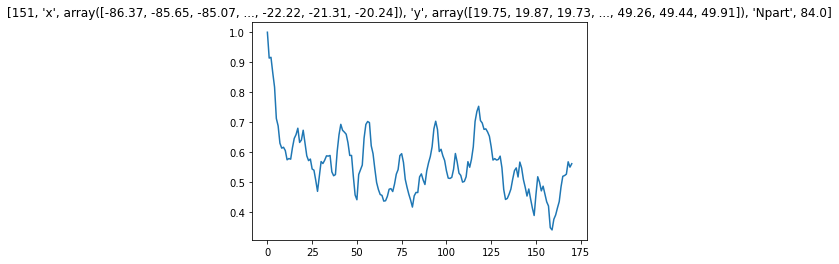

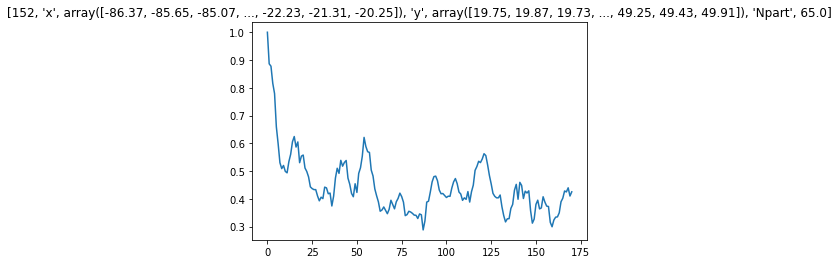

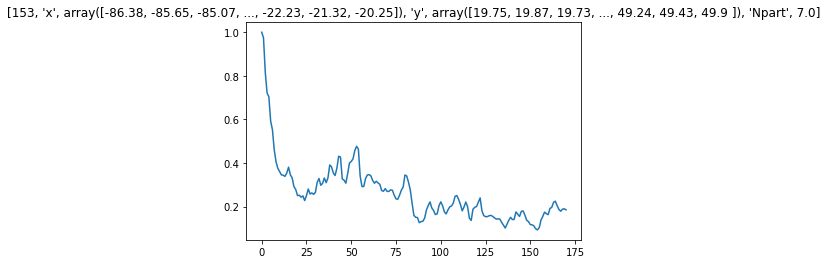

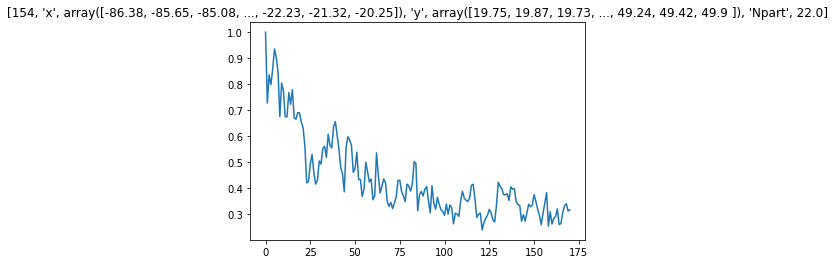

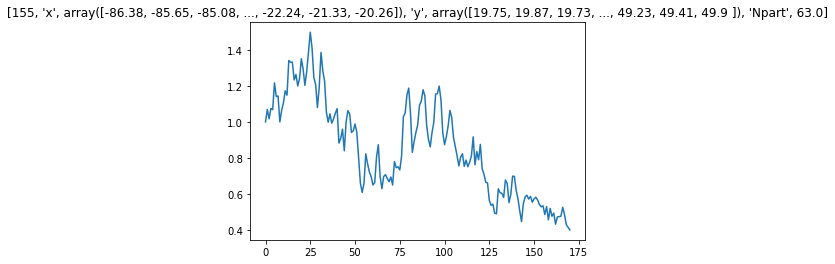

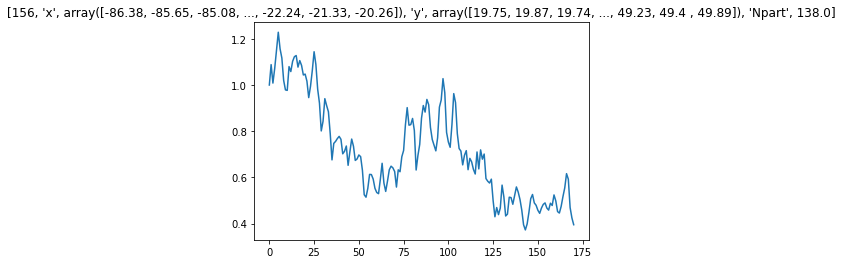

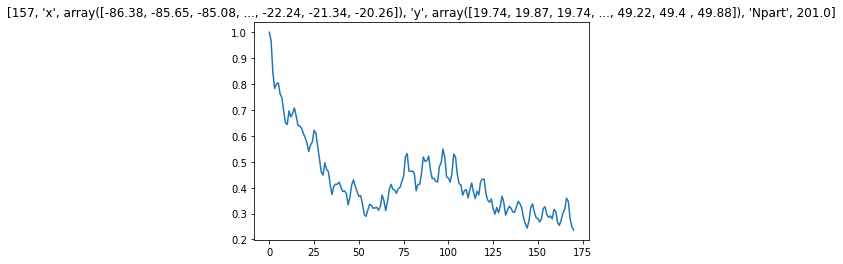

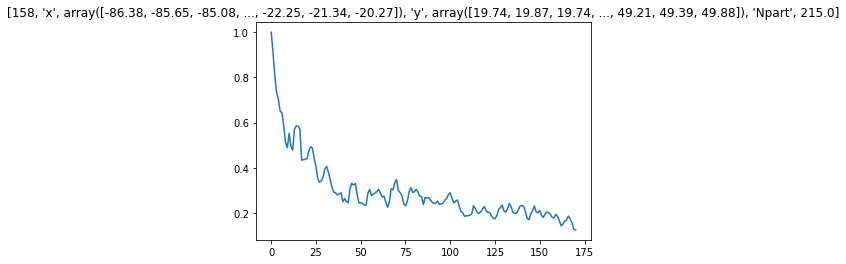

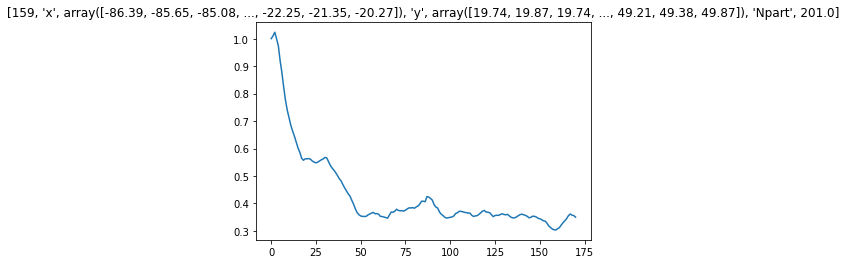

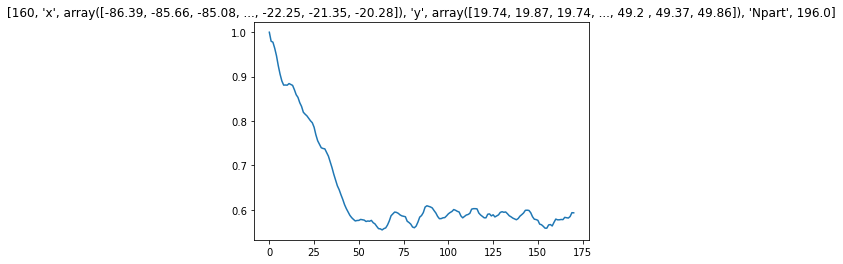

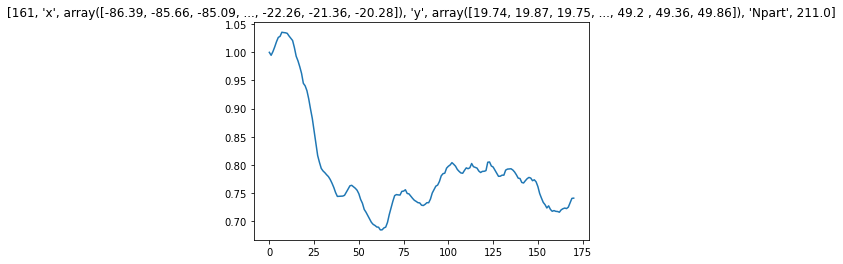

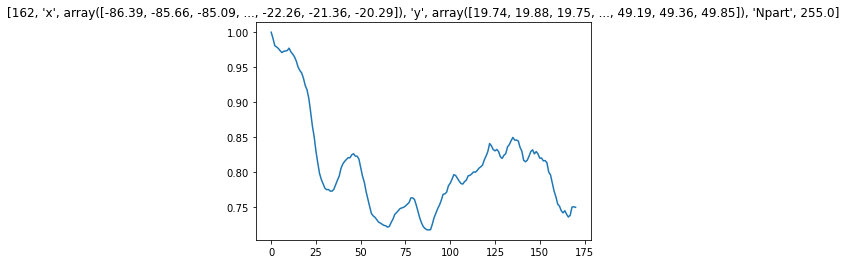

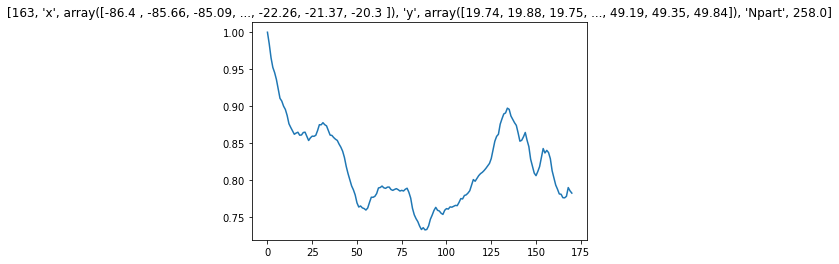

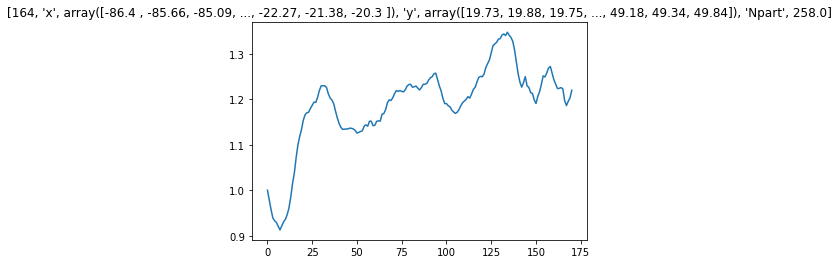

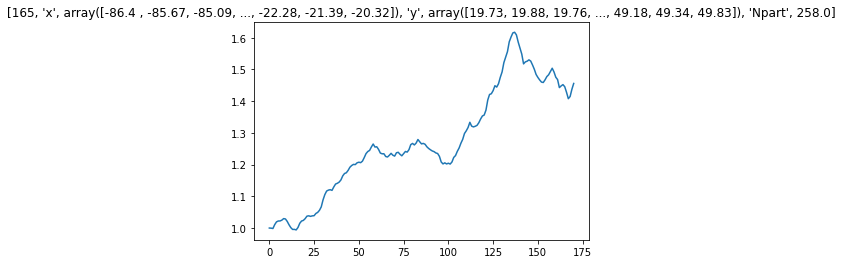

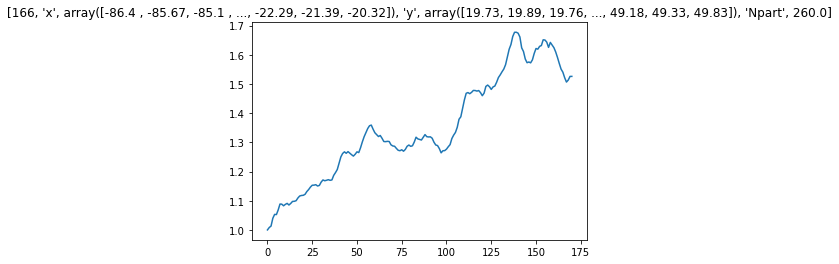

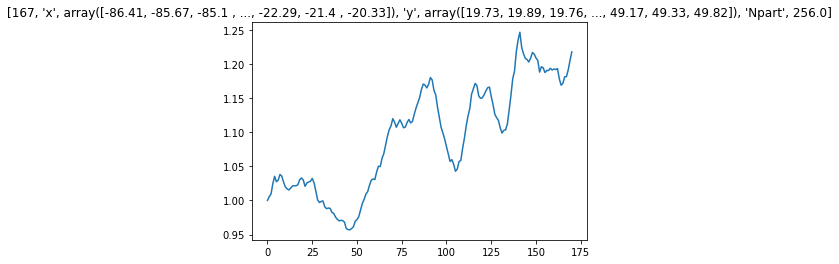

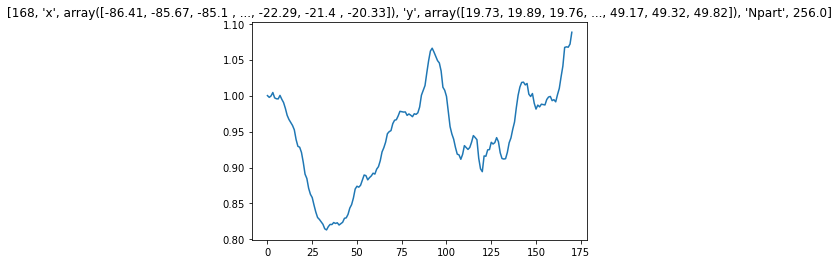

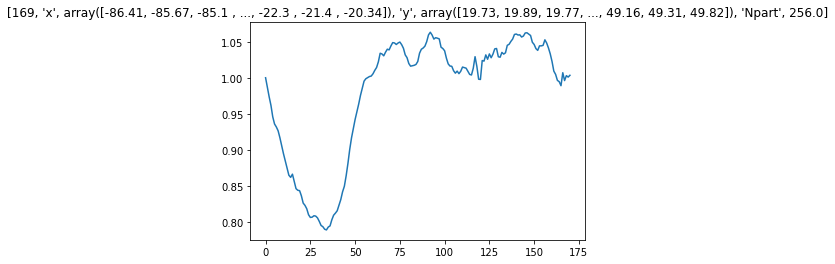

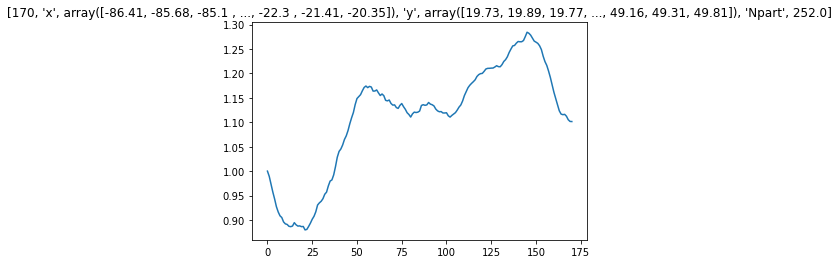

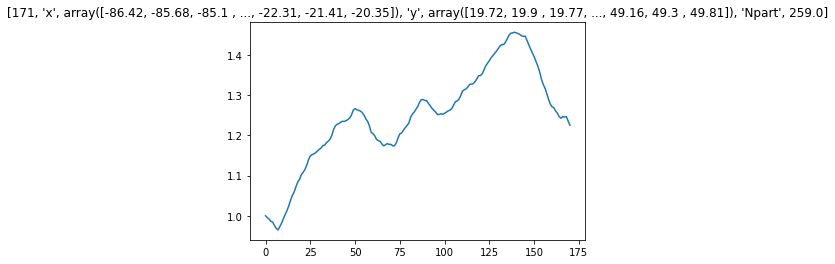

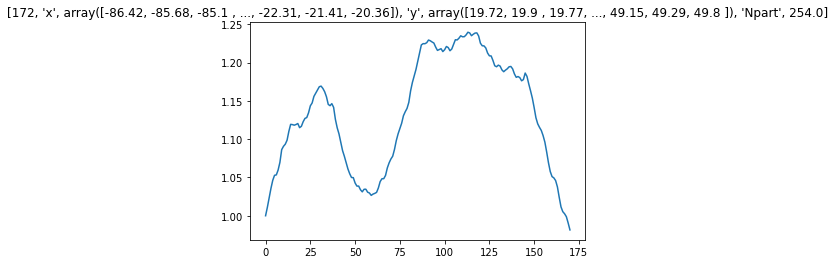

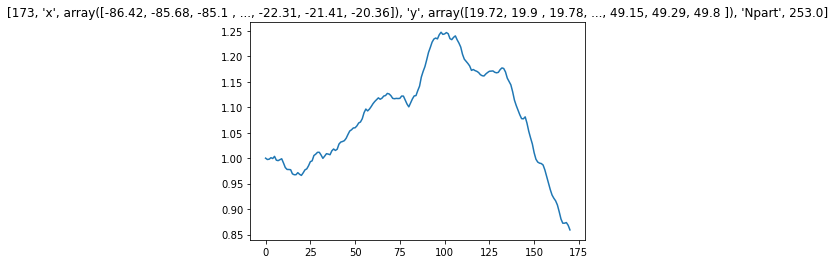

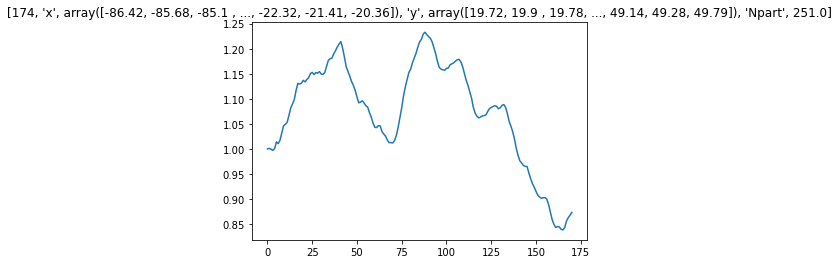

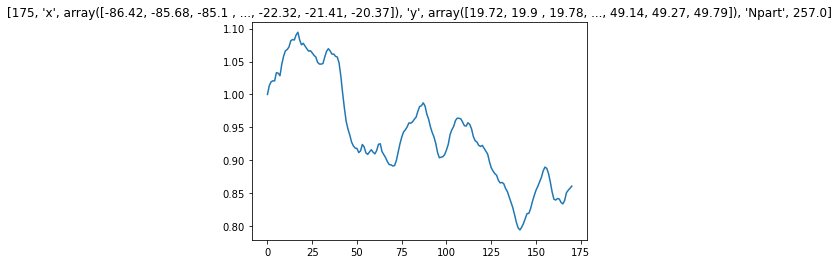

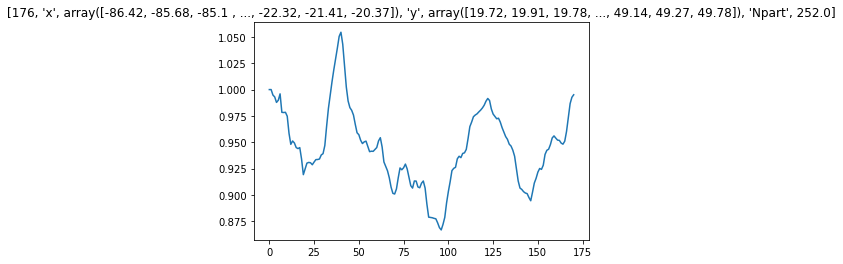

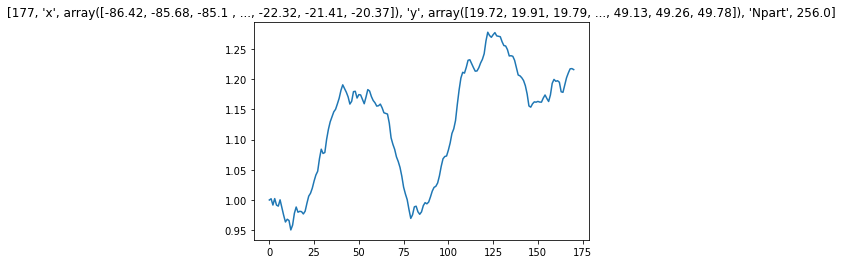

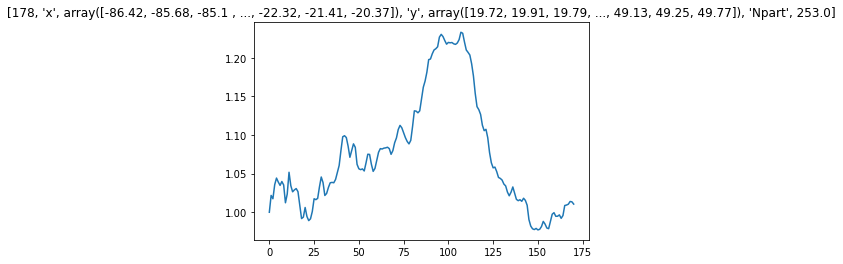

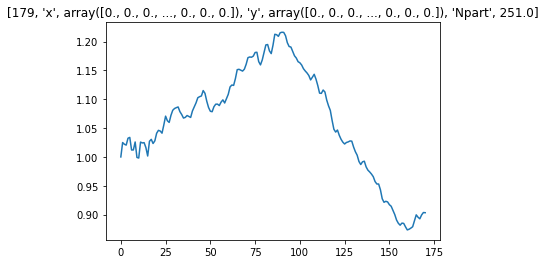

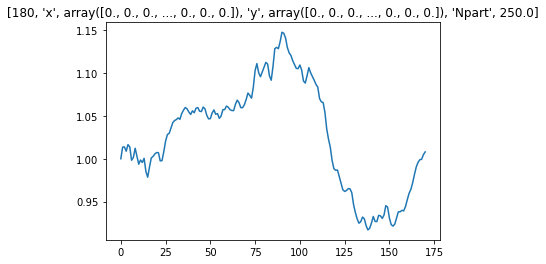

IndexError: index 181 is out of bounds for axis 1 with size 181

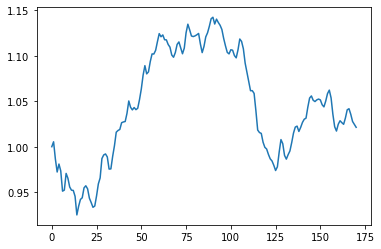

In [195]:
for i in np.arange(len((urms[0,0,:]))):
    plt.plot(rx[:-10,i])
    plt.title( [i,'x',np.round((mux1[0,i]),2), 'y',np.round((muy1[0,i]),2),'Npart',Npart[0,0,i]])
    plt.show()